# Research Objective, Research Questions and Hypothesis

The dataset I've picked for my final project contains daily weather observations from Australia. This dataset contains 
location, several numerical variables describing the weather conditions (eg. temperature, wind speed, humidity), a couple of categorical variables for windspeed and finally 2 boolean variables for if it rained on a particular day and if it rained the next day. Given the variables, I would like to see if I can predict if it will rain the next day. I have some knowledge on factors affecting rain and I believe I can use evaporation, humidity, pressure, amount of cloud cover and temperature to predict this. 

Specifically, my research objective is to predict if it will rain the next day using evaporation, humidity, pressure, amount of cloud cover and temperature data from a particular day. My research questions are:

1. Can I accurately (accuracy score > 90%) predict if it will rain the next day using evaporation, humidity, pressure, amount of cloud cover and temperature data of a particular day with classifier algorithms?
2. What are the important factors in predicting if it will rain the next day?
3. Which locations in Australia get the most rain?
4. Is it more likely to rain the next day if it rained on a particular day?
5. Which locations in Australia are the hottest?

My hypothesis for my primary research question (research question 1) is that we can predict if it will rain the next day using evaporation, humidity, pressure, amount of cloud cover and temperature data on a particular day at an accuracy greater than 90%. It will likely rain if the evaporation and humidity are high, pressure and temperature are low and the sky has an overcast (high amount of cloud cover). The dataset has data for these variables for 9am and 3pm of a particular day and I will be using 3pm data to predict if it will rain the next day.

## Data Background

This dataset has ~145,000 daily observations from over 10 years. The description of each column are as follows:

**Date:** Date of observation.

**Location:** Name of the location of the weather station.

**MinTemp:** Minimum temperature in degrees celsius.

**MaxTemp:** Maximum temperature in degrees celsius.

**Rainfall:** Amount of rainfall recorded for the day in mm.

**Evaporation:** Evaporation (mm) in the 24 hours.

**Sunshine:** Number of hours of bright sunshine in the day.

**WindGustDir:** Direction of the strongest wind gust in the 24 hours to midnight.

**WindGustSpeed:** Speed (km/h) of the strongest wind gust in the 24 hours to midnight.

**WindDir9am:** Direction of the wind at 9am.

**WindDir3pm:** Direction of the wind at 3pm.

**WindSpeed9am:** Wind speed (km/hr) averaged over 10 minutes prior to 9am.

**WindSpeed3pm:** Wind speed (km/hr) averaged over 10 minutes prior to 3pm.

**Humidity9am:** Humidity (percent) at 9am.

**Humidity3pm:** Humidity (percent) at 3pm.

**Pressure9am:** Atmospheric pressure (hpa) reduced to mean sea level at 9am.

**Pressure3pm:** Atmospheric pressure (hpa) reduced to mean sea level at 3pm.

**Cloud9am:** Fraction of sky obscured by cloud at 9am, measured in "oktas", which are a unit of eighths. It records how many eighths of the sky are obscured by clouds. A 0 measure indicates a completely clear sky whilst an 8 indicates that it is completely overcast.

**Cloud3pm:** Fraction of sky obscured by cloud at 3pm.

**Temp9am:** Temperature (degrees C) at 9am.

**Temp3pm:** Temperature (degrees C) at 3pm.

**RainToday:** This is a boolean variable. It's yes if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise it will be no. In layman's term, it will be yes if it rained and no if it didn't rain.

**RainTomorrow:** A boolean variable for if it rained the next day. Similar to varible above, it's yes if it rained and no if it didn't rain.

Out of the 23 columns, 6 of them are categorical variables, 16 are numerical variables and 1 is a date column. Note that I have created nominal versions of the categorical data for ease of algorithm implementations.

# Step 2 Data Science Analysis

## Descriptive Statistics

The variables of interest for my 1st research question are:
1. Evaporation
2. Humidity3pm
3. Pressure3pm
4. Cloud3pm
5. Temp3pm
6. RainTomorrow

The variables of interest for my 3rd to 5th research questions are:
1. Location
2. MinTemp
3. MaxTemp
4. Rainfall
5. RainToday
6. RainTomorrow

In total I have 11 distinct variables for interest. Out of the 11, there are 8 quantitative variables and 3 categorical variables.

In [1]:
#loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
weatherAUSData = pd.read_csv('/Users/tanesha.subramaniam/Downloads/weatherAUS.csv')
weatherAUSData.head()

,Date,Location,Location_Nominal,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustDir_Nominal,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainToday_Nominal,RainTomorrow,RainTomorrow_Nominal
0,4/19/13,Adelaide,1,11.6,20.4,0.0,4.0,8.5,E,1.0,...,1026.7,1022.7,NaN,NaN,13.5,19.8,No,0.0,NaN,NaN
1,5/4/13,Adelaide,1,14.8,19.5,0.2,NaN,6.8,E,1.0,...,1025.1,1023.5,NaN,NaN,15.8,18.4,No,0.0,NaN,NaN
2,5/5/13,Adelaide,1,12.3,20.2,NaN,NaN,4.8,E,1.0,...,1024.7,1021.0,NaN,NaN,14.3,19.2,NaN,NaN,No,0.0
3,11/4/08,Adelaide,1,11.6,25.9,0.0,5.8,9.0,E,1.0,...,1019.5,1012.9,NaN,NaN,15.1,25.0,No,0.0,No,0.0
4,11/12/08,Adelaide,1,24.1,36.6,0.0,11.4,9.9,E,1.0,...,1011.2,1006.5,NaN,NaN,31.3,36.2,No,0.0,No,0.0


In [3]:
#creating frequency distribution and calculating relevant proportions for RainTomorrow
raintmr_frequency = pd.crosstab(index = weatherAUSData["RainTomorrow"].fillna('NA'), columns="count")
proportion = pd.crosstab(index = weatherAUSData["RainTomorrow"].fillna('NA'), columns= "proportion", normalize = True)
frames = [raintmr_frequency, proportion*100] #multiplying 100 to display as precent 
pd.concat(frames, axis = 1)

col_0,count,proportion
RainTomorrow,,
NA,3267,2.245978
No,110316,75.839406
Yes,31877,21.914616


In [4]:
#creating frequency distribution and calculating relevant proportions for RainToday
raintmr_frequency = pd.crosstab(index = weatherAUSData["RainToday"].fillna('NA'), columns="count")
proportion = pd.crosstab(index = weatherAUSData["RainToday"].fillna('NA'), columns= "proportion", normalize = True)
frames = [raintmr_frequency, proportion*100] #multiplying 100 to display as precent 
pd.concat(frames, axis = 1)

col_0,count,proportion
RainToday,,
NA,3261,2.241853
No,110319,75.841468
Yes,31880,21.916678


In [5]:
#creating contingency table between RainToday and RainTomorrow
rain_contingency = pd.crosstab(index = weatherAUSData["RainToday"].fillna('NA'), 
                               columns=weatherAUSData["RainTomorrow"].fillna('NA'), margins=True)

rain_contingency.columns = ["NA","No","Yes","rowtotal"]
rain_contingency.index= ["NA","No","Yes","coltotal"]

#RainTomorrow as columns and RainToday as rows
rain_contingency

,NA,No,Yes,rowtotal
NA,1855,730,676,3261
No,987,92728,16604,110319
Yes,425,16858,14597,31880
coltotal,3267,110316,31877,145460


In [6]:
#For quantitative variables create numerical summaries that are ungrouped  and grouped by a categorical variable

#numerical summary for rainfall
weatherAUSData['Rainfall'].describe()

count    142199.000000
mean          2.360918
std           8.478060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [7]:
#numerical summary of rainfall by location
rain_df = weatherAUSData.groupby(['Location'])['Rainfall'].describe()
rain_df.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Cairns,2988.0,5.742035,18.280975,0.0,0.0,0.0,2.600,278.4
Darwin,3193.0,5.092452,16.450148,0.0,0.0,0.0,1.800,367.6
CoffsHarbour,2953.0,5.061497,17.444480,0.0,0.0,0.0,2.000,371.0
GoldCoast,2980.0,3.769396,13.054984,0.0,0.0,0.0,1.200,183.4
Wollongong,2982.0,3.594903,11.897181,0.0,0.0,0.0,1.000,192.0
Williamtown,2553.0,3.591108,11.757872,0.0,0.0,0.0,1.600,225.0
Townsville,3033.0,3.485592,14.985589,0.0,0.0,0.0,0.200,236.8
NorahHead,2929.0,3.387299,9.387137,0.0,0.0,0.0,1.600,126.4
Sydney,3337.0,3.324543,9.887184,0.0,0.0,0.0,1.400,119.4


In [8]:
#numerical summary for evaporation
weatherAUSData['Evaporation'].describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

In [9]:
#numerical summary of evaporation by RainTomorrow
weatherAUSData.groupby(['RainTomorrow'])['Evaporation'].describe()

,count,mean,std,min,25%,50%,75%,max
RainTomorrow,,,,,,,,
No,63491.0,5.734807,4.332891,0.0,2.8,5.0,7.6,145.0
Yes,17859.0,4.527779,3.469052,0.0,2.2,3.8,6.2,74.8


In [10]:
#numerical summary for cloud
weatherAUSData['Cloud3pm'].describe()

count    86102.000000
mean         4.509930
std          2.720357
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud3pm, dtype: float64

In [11]:
#numerical summary of cloud by RainTomorrow
weatherAUSData.groupby(['RainTomorrow'])['Cloud3pm'].describe()

,count,mean,std,min,25%,50%,75%,max
RainTomorrow,,,,,,,,
No,64811.0,3.921896,2.667284,0.0,1.0,4.0,7.0,9.0
Yes,20288.0,6.360065,1.947514,0.0,6.0,7.0,8.0,8.0


### Numerical Summaries

#### Frequency Distribution, Relative Proportions and Contingency Tables
Looking at the frequency distributions for RainTomorrow and RainToday, we can see that the mode is No (i.e no rain). About 2% of the data has NA values. Looking at the contingency table that shows us the relationship between RainToday and RainTomorrow, we can see that if it rained on a particular day (RainToday = yes) then it is more likely not to rain the next day (RainTomorrow = no). Another way of looking at it is, if it rained the next day (RainTomorrow = yes), then it is more likely that it didn't rain the day before (RainToday = no). Note that RainTomorrow is the columns and RainToday is the rows in the contingency table.

#### Quantitative Numerical Summaries
**Rainfall:** The average rainfall for the dataset is 2.36mm. If we look at rainfall grouped by location, we can see that Cairns has the highest mean, standard deviation, 75th percentile value and the third highest max value. Darwin has the second highest mean and max value. CoffsHarbour has the third highest mean and highest max value. Woomera has the lowest mean and one of the lowest max values. The min and 25% percentile value for all locations are 0.

**Evaporation:** The mean evaporation for the dataset is 5.47mm. If we look at evaporation grouped by RainTomorrow, see that every single metric is higher for group No compared to group Yes, except for the min value, which is the same for both groups. The evaporation is higher on a particular day if it doesn't rain the next day.

**Cloud3pm:** The mean for amount of cloud cover at 3pm on a particular day is 4.5 oktas. If we look at cloud cover grouped by RainTomorrow, we can see that the mean, 25% percentile, median, 75% percentile is higher for group Yes compared to group No. The amount of cover at 3pm tends to be higher if it rains the next day.

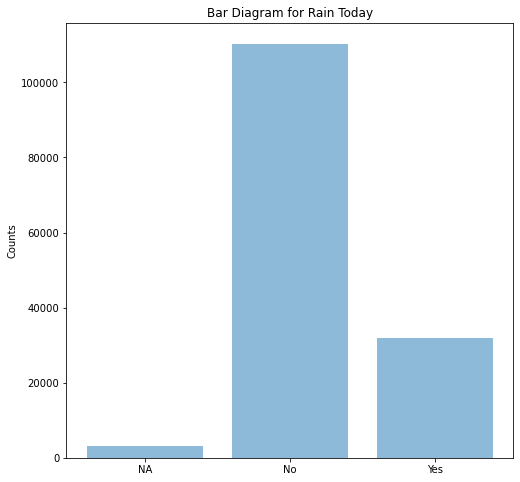

In [12]:
#For categorical variables use bar diagrams, clustered bar graphs grouped by categorical variables.

#bar diagram for RainToday
RainToday_labels = ('NA', 'No', 'Yes')
y_pos_RainToday = np.arange(len(RainToday_labels))
values = [3261,110319,31880]

plt.figure(figsize=(8,8))
plt.rcParams["axes.grid"] = False
plt.bar(y_pos_RainToday, values, align='center', alpha=0.5)
plt.xticks(y_pos_RainToday, RainToday_labels)
plt.ylabel('Counts')
plt.title('Bar Diagram for Rain Today')

plt.show()

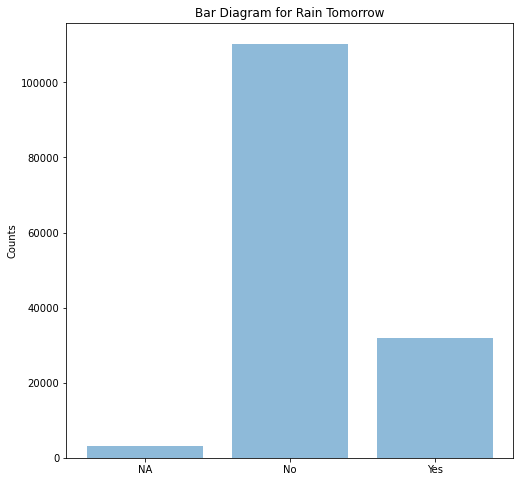

In [13]:
#bar diagram for RainTomorrow
RainTomorrow_labels = ('NA', 'No', 'Yes')
y_pos_RainTomorrow = np.arange(len(RainTomorrow_labels))
values = [3267,110316,31877]

plt.figure(figsize=(8,8))
plt.rcParams["axes.grid"] = False
plt.bar(y_pos_RainTomorrow, values, align='center', alpha=0.5)
plt.xticks(y_pos_RainTomorrow, RainTomorrow_labels)
plt.ylabel('Counts')
plt.title('Bar Diagram for Rain Tomorrow')

plt.show()

       NA     No    Yes
NA   1855    730    676
No    987  92728  16604
Yes   425  16858  14597


<AxesSubplot:title={'center':'RainTomorrow Bar Graph Grouped by RainToday'}, xlabel='RainToday'>

<Figure size 576x576 with 0 Axes>

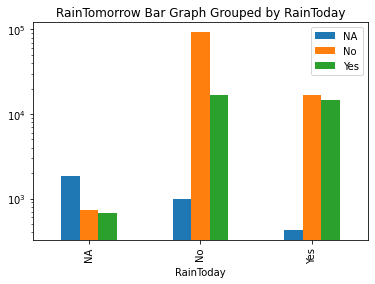

In [14]:
#use contingency table and drop column and row totals
rain = rain_contingency[:-1]
rain = rain.drop("rowtotal", axis = 1)
print(rain)

#plot clustered bar graph of RainTomorrow grouped by RainToday
#taking log of values since the data range is large
plt.figure(figsize = (8,8))
rain.plot(kind = 'bar', xlabel = 'RainToday', stacked = False, logy = True, title = 'RainTomorrow Bar Graph Grouped by RainToday')

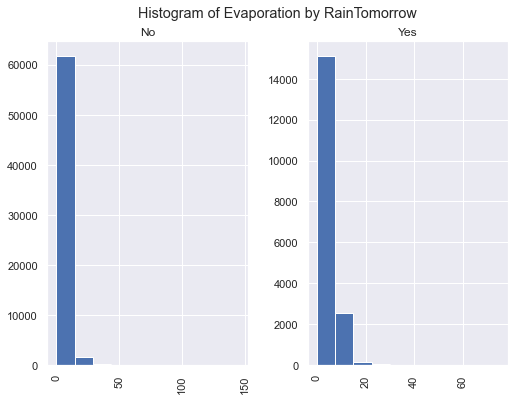

In [15]:
#For quantitative variables create histograms and boxplots grouped by categorical variables

#creating histogram of evaporation and RainTomorrow
sns.set() 
weatherAUSData.hist(by = 'RainTomorrow', column = 'Evaporation', layout = (1,2), figsize = (8,6))
plt.suptitle('Histogram of Evaporation by RainTomorrow')
plt.show()

Text(0.5, 1.0, 'Boxplot of Evaporation by RainTomorrow')

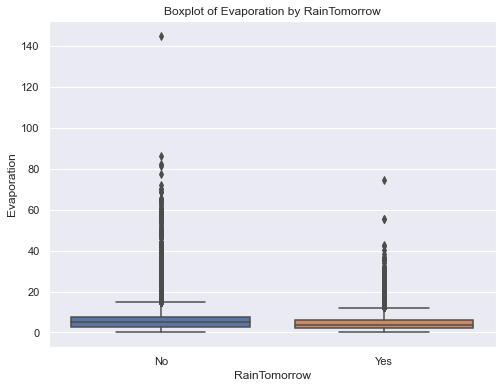

In [16]:
#creating boxplot of evaporation and RainTomorrow
plt.figure(figsize=(8,6))
sns.boxplot(x = "RainTomorrow", y = "Evaporation", data = weatherAUSData)
plt.title('Boxplot of Evaporation by RainTomorrow')

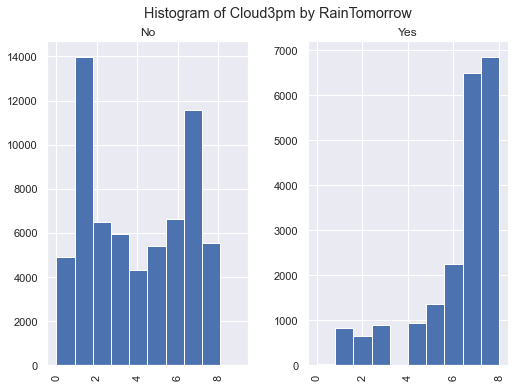

In [17]:
#creating histogram of Cloud3pm and RainTomorrow
sns.set() 
weatherAUSData.hist(by = 'RainTomorrow', column = 'Cloud3pm', layout = (1,2), figsize = (8,6))
plt.suptitle('Histogram of Cloud3pm by RainTomorrow')
plt.show()

Text(0.5, 1.0, 'Boxplot of Cloud3pm by RainTomorrow')

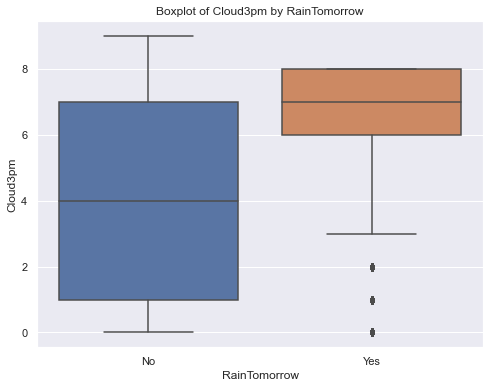

In [18]:
#creating boxplot of Cloud3pm and RainTomorrow
plt.figure(figsize=(8,6))
sns.boxplot(x = "RainTomorrow", y = "Cloud3pm", data = weatherAUSData)
plt.title('Boxplot of Cloud3pm by RainTomorrow')

### Graphical Summaries

#### Bar Diagram and Clustered Bar Graph

The bar diagram for RainToday and RainTomorrow confirmed what we saw in the frequency distribution. The mode is group No (i.e no rain) and there is a small number of records that don't have a value (i.e NA). The clustered bar graph also validated what we saw in the contingency table, if it rained today (RainToday = yes) then it is more likely not to rain the next day (RainTomorrow = no).

#### Histogram and Boxplots

**Evaporation and RainTomorrow:** Looking at the histrograms for evaporation grouped by RainTomorrow, we can see that both groups have a right-skew distribution. This can be validated by looking at the numerical summary for evaporation grouped by RainTomorrow. For both groups, the mean is greater than the median. This is a property of a right-skewed distribution. We can also validate this by looking at the boxplot. Both groups have a longer upper whisker, small interquartile range, shorter bottom whisker and many upper outliers. Having a longer upper whisker and upper outliers indicates that the distribution is right skewed. Another callout about the boxplots is that the interquartile range is very small, with the Yes group having a slightly smaller interquartile range compared to the No group. This is aligned with what we saw for the standard deviations for these two groups. The standard deviation for the Yes group is ~3.47, which is smaller than the standard deviation for the No group, ~4.33. This means that the data points in the Yes group is slighlty closer to the mean compared to the No group.

**Cloud3pm and RainTomorrow:** Looking at the histrograms for amount of cloud cover grouped by RainTomorrow, we can see that both groups have different distributions. Group No has a symmetrical distribution and Group Yes has a left skew distribution. This can be validated by looking at the numerical summary for Cloud3pm grouped by RainTomorrow. For Group No, we can see that the mean and median is the same. For Group Yes, the median is greater than the mean, which is a property of a left-skewed distribution. We can also validate this by looking at the boxplot. The boxplot for Group No is pretty evenly distributed with no outliers. The boxplot for Group Yes has no upper whisker but a long lower whisker, with outliers. The long lower whisker is an indication that the distribution is left skewed. Another callout about the boxplots is that the interquartile ranges are different. The interquartile range for the No group is bigger than the Yes group. This seems aligned with what we saw for the standard deviations for these two groups. The standard deviation for the Yes group is ~1.95, which is smaller than the standard deviation for the No group, ~2.67. This means that the data points in the Yes group is closer to the mean compared to the No group.

### Additional Descriptive Statistics
I will do additional analysis to answer my 5th research question, *Which locations in Australia get the most rain?*.


In [19]:
#creating a pivot table for average Min temperature and Max temperature by location
table = weatherAUSData.pivot_table(values=['MinTemp','MaxTemp'], index='Location', aggfunc='mean')

#sorting the data in descending order by MaxTemp first then by MinTemp
table.sort_values(by=['MaxTemp','MinTemp'], ascending=False)

,MaxTemp,MinTemp
Location,,
Katherine,34.935436,20.553564
Darwin,32.540977,23.209305
Uluru,30.383195,14.466688
Cairns,29.558849,21.220467
Townsville,29.367160,20.417874
AliceSprings,29.248420,13.142284
Moree,26.950548,12.905853
Woomera,26.596707,13.363727
Brisbane,26.448380,16.423807


### Summary of descriptive statistics 

The descriptive statistics answered 3 research questions:

**3. Which locations in Australia get the most rain?** *Based on the rainfall numerical summary grouped by location, we saw that Cairns, Darwin and CoffsHarbour gets the most rain.*

**4. Is it more likely to rain the next day if it rained on a particular day?** *Based on the contingency table and the clustered bar graph, we saw that it is less likely to rain the next day if it rained on a particular day.*

**5. Which locations in Australia are the hottest?** *Based on the pivot table above, we can see that Katherine and Darwin are the two hottest location in Australia.*

Other key points are as follows:

**Evaporation:** *Evaporation appears to be higher on a particular day if it didn't rain the next day.*

**Cloud3pm:** *Amount of cloud cover appears to be higher on a particular day if it rained the next day.*

## Correlation and Regression

The 2 quantitative variables I pick for this analysis are Humidity3pm and Temp3pm. I think these two variables tend to be correlated. If the temperature decreases, the humidity increases. For the regression analysis, I will using Humidity3pm as the explanatory variable and Temp3pm as the response variable.

<AxesSubplot:>

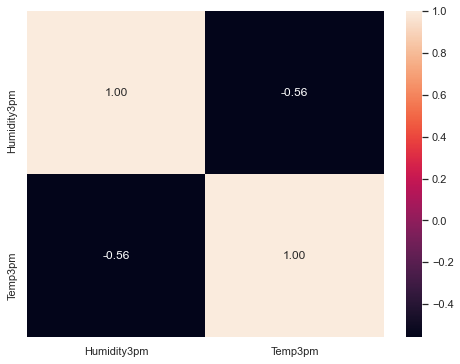

In [20]:
#checking correlation between Humidity3pm and Temp3pm
plt.figure(figsize=(8,6))
correlation_check = weatherAUSData[['Humidity3pm', 'Temp3pm']]
sns.heatmap(correlation_check.corr(),annot=True,fmt='.2f')

<Figure size 720x720 with 0 Axes>

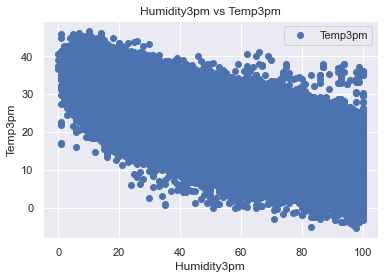

In [21]:
#creating a scatter diagram of Humidity3pm and Temp3pm
plt.figure(figsize=(10,10))
weatherAUSData.plot(x ='Humidity3pm', y ='Temp3pm', style='o')  
plt.title('Humidity3pm vs Temp3pm')  
plt.xlabel('Humidity3pm')  
plt.ylabel('Temp3pm')  
plt.show()

In [22]:
#importing packages for regression analysis
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

#drop NAs
regression_data = weatherAUSData.dropna()

#reshape data
Humidity_reshape = regression_data['Humidity3pm'].values.reshape(-1,1)
Temp_reshape = regression_data['Temp3pm'].values.reshape(-1,1)

#splitting data into training (75%) and test(25%)
X_train, X_test, y_train, y_test = train_test_split(Humidity_reshape, Temp_reshape, test_size=0.25, random_state=0)

regressor = LinearRegression() 

#Training the Regression algorithm
regressor.fit(X_train, y_train) 

#predict values
y_pred = regressor.predict(X_test)

#print R^2
print(r2_score(y_test, y_pred))

0.25278404159286216


### Correlation coefficient, scatter diagram and R squared
The correlation coefficient between Humidity3pm and Temp3pm is -0.56. This is a moderate negative correlation. Negative correlation implies that when one variable increases, the other decreases. 

The scatter plot of the two variables validates this observation. We can see that there is a linear relationship between them and the data points form a diagonal line from the upper left corner of the plot to the lower right corner of the plot. Since Humidity3pm was plotted on the x-axis and Temp3pm was plotted on the y-axis, the plot indicates that as the humidity increases, the temperature decreases.

To get the R squared, I fit a linear regression model using Humidity3pm as my explanatory variable and Temp3pm as my response variable. The R squared was 0.2469, which means that the model can only explain 24.69% of the variability of the response variable, Temp3pm around its mean. This is a low R squared, ideally we would want to explain 100% or at least close to 100% of the variability.

### Hypothesis test for correlation significance
We know that that the correlation coefficient between the Humidity3pm and Temp3pm in the sample data I have is -0.56. This appears to be a moderate negative correlation. I would like see if the correlation strength between these two variables is strong enough to use to model the relationship in the population. Since I do not have data for the entire population, I would need to conduct a hypothesis test.

The test that will be conducted is a t-test and the significance level will be 0.05. The sample correlation coefficient, 𝑟 = -0.56, is our estimate of the unknown population correlation coefficient. In the hypothesis test, we are deciding if the population correlation coefficient, 𝜌 is close to zero or is significantly different from zero. The null and alternate hypotheses are as follows:

Null Hypothesis: 𝐻0: 𝜌=0 

Alternate Hypothesis: 𝐻𝑎: 𝜌≠0

In words, this means:

Null Hypothesis: The population correlation coefficient is not significantly different from 0.

Alternate Hypothesis: The population correlation coefficient is significantly different from 0.

In [25]:
import scipy
from scipy import stats

#using linegress to get p-value for null hypothesis: slope is 0
slope, intercept, r_value, p_value, std_err = stats.linregress(Humidity_reshape[:,0], Temp_reshape[:,0])
print('slope=%.3f, r_value=%.3f, p=%.3f, std_err=%.3f, alpha = 0.05'% (slope, r_value, p_value, std_err))

slope=-0.168, r_value=-0.497, p=0.000, std_err=0.001, alpha = 0.05


I will draw my conclusion using the p-value method. I used the stats.linregress function from the scipy package to calculate the p-value. That p-value is a two-sided p-value for a hypothesis test whose null hypothesis is that the slope is 0. If the slope is 0, that means there is no significant relationship between the explanatory and response variable (i.e no correlation). The p-value was 0.00, which is less than the significance level of 0.05. Since the p-value is less than the significance value, we reject the null hypothesis and accept the alternate hypothesis that the population correlation coefficient, 𝜌 is significantly different from 0. This means there is sufficient evidence to conclude that there is a linear relationship between Humidity3pm and Temp3pm because the correlation coefficient is significantly different from 0.

## Inferential Statistics

### Independent t test

For the independent t test, I will check to see if the rainfall from Albany and Ballarat are significantly different from each other. We would consider this an independent sample test because Albany and Ballarat are two separates places and data is collected separately, and therefore they are two separate samples. Additionally, Albany and Ballarat have standard deviations that are very close to each other. For an independent t-test, both groups should have the same variance. The null and alternate hypotheses are as follows:

Null Hypothesis: 𝐻0: μ1-μ2=0

Alternate Hypothesis: 𝐻𝑎: μ1-μ2≠0

In words, this means:

Null Hypothesis: The differences between the means is equal to 0.

Alternate Hypothesis: The difference between the means does not equal to 0.

For this test, the significance level will be 0.05. Since, I didn't collect the data, I can't confirm that this data is a simple random sample. Additionally, since this data is contains daily weather oberservations over 10 years, I wouldn't consider this a simple random sample. Therefore, before I run the test, I will randomly select observations from each groups.

In [29]:
#implementing independent t test
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

#extracting albany's rainfall data and dropping NAs
albany = weatherAUSData.loc[weatherAUSData['Location'] == 'Albany','Rainfall'].dropna()

#extracting ballarat's rainfall data and dropping NAs
ballarat = weatherAUSData.loc[weatherAUSData['Location'] == 'Ballarat','Rainfall'].dropna()

#take random samples of half of the data
albany = albany.sample(frac=0.50)
ballarat = ballarat.sample(frac=0.50)

t, p = ttest_ind(albany, ballarat, equal_var=False) #both variables have similar std d but not same variance
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 2.81471  p = 0.00491376


Since the p-value, 0.0049 is less than the significance level of 0.05, we reject the null hypothesis and accept the alternate hypothesis that the difference between the means does not equal to 0. These two groups (Albany and ballarat) are significantly different from each other. This is aligned with the table seen in the data descriptive section, describing rainfall by location. The mean rainfall for Albany was 2.26 while the mean rainfall for Ballarat was 1.74.

Another metric to look at is the t-statistic. The t-statistic is 2.815 and the t-critical value for infinity degrees of freedom and 0.5 significance level for two tailed test is 1.960. Since 2.815 is greater than 1.960, this means that the t-test value falls in the critical region (i.e rejection region of null hypothesis).

### Dependent or Paired t test

Unfortunately, none of the patterns demonstrated in the data descriptive section would be suitable for a paired t-test so I will implement a paired t-test using a couple of variables of interest and an additional variable from the dataset. For this test , I will check to see if the temperature at 9am and the temperature at 3pm is significantly different from each other for Canberra. This is considered a paired test because for each daily observation in Canberra, the temperature is measured twice. The null and alternate hypotheses are as follows:

Null Hypothesis: 𝐻0: μ1-μ2=0

Alternate Hypothesis: 𝐻𝑎: μ1-μ2≠0

In words, this means:

Null Hypothesis: The differences between the means is equal to 0.

Alternate Hypothesis: The difference between the means does not equal to 0.

For this test, the significance level will be 0.05. Since, I didn't collect the data, I can't confirm that this data is a simple random sample. Additionally, since this data is contains daily weather oberservations over 10 years, I wouldn't consider this a simple random sample. Therefore, before I run the test, I will randomly select observations from each groups.

In [30]:
from scipy.stats import ttest_rel

#extracting canberra's rainfall data and dropping NAs
canberra = weatherAUSData.loc[weatherAUSData['Location'] == 'Canberra',['Temp9am','Temp3pm']].dropna()

#take random samples of the data
canberra = canberra.sample(frac=0.60)

temp9am = canberra['Temp9am']
temp3pm = canberra['Temp3pm']

t, p = ttest_rel(temp3pm, temp9am)
print("ttest_rel:            t = %g  p = %.3f" % (t, p))

ttest_rel:            t = 83.1501  p = 0.000


Since the p-value, 0 is less than the significance level of 0.05, we reject the null hypothesis and accept the alternate hypothesis that the difference between the means does not equal to 0. These two groups (the temperature at 9am and 3pm) are significantly different from each other. This seems like an obvious conclusion. The temperature in the morning is almost always different from the temperature in the afternoon.

Another metric to look at is the t-statistic. The t-statistic is 83.15 and the t-critical value for infinity degrees of freedom and 0.5 significance level for two tailed test is 1.960. Since 83.15 is significantly greater than 1.960, this means that the t-test value falls in the critical region (i.e rejection region of null hypothesis).

## Data Science Algorithms

### Decision Trees
As mentioned in my first research question, I would like to predict if it rain the next day with classifier algorithms. Decision Trees is a type of a classifier algorithm. Personally, I do favor decision trees and ensemble algorithms over other classifiers like k-NN and Naïve Bayes’ for a few reasons. Firstly, decision trees can handle both categorical and quantitative data. While most of my variables in this dataset are numerical, not all datasets in my prior implementations were this way and future implementations will be this way. Secondly, the algorithm's performance will not be dergaded by correlated features. For this dataset, I am sure many of my variables are correlated, as many of the weather factors work together to form rain. Fortunately, I don't have to worry about it for this implementation. Finally, there is no assumption that needs to be made about the underlying data distribution. Overall, I believe there is less data clean up or preparation I need to do with decision trees , which makes it favorable. 

#### Prepare data: preprocessing transformations, data cleaning, dealing with null and outlier values.

First, I am going to check if there are any NAs. From the data description section, we know that there are NAs but I would like to see which columns have NAs. Once I've checked this, I will drop them as it might degrade the algorithm's performance. After this, I will check for outliers in the numerical variables. Once I've checked this, I will also drop outliers as decision trees are sensitive to outliers. I will not be standardizing the data here. I would like to do feature selection first, before standardizing my data.

In [31]:
#check for NAs
print(weatherAUSData.isnull().values.any())

#for loop to check which variables have NAs
for col in weatherAUSData.columns:
    found = weatherAUSData[weatherAUSData[col].isnull()]
    print(col, ':', len(found))
    
#drop NAs    
weatherAUSData_noNA = weatherAUSData.dropna()
print(weatherAUSData_noNA.shape)

True
Date : 0
Location : 0
Location_Nominal : 0
MinTemp : 1485
MaxTemp : 1261
Rainfall : 3261
Evaporation : 62790
Sunshine : 69835
WindGustDir : 10326
WindGustDir_Nominal : 10326
WindGustSpeed : 10263
WindDir9am : 10566
WindDir9am_Nominal : 10566
WindDir3pm : 4228
WindDir3pm_Nominal : 4228
WindSpeed9am : 1767
WindSpeed3pm : 3062
Humidity9am : 2654
Humidity3pm : 4507
Pressure9am : 15065
Pressure3pm : 15028
Cloud9am : 55888
Cloud3pm : 59358
Temp9am : 1767
Temp3pm : 3609
RainToday : 3261
RainToday_Nominal : 3261
RainTomorrow : 3267
RainTomorrow_Nominal : 3267
(56420, 29)


In [32]:
#for loop to check for outliers in numerical variables
numerical_columns = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',
                     'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm', 
                     'Temp9am', 'Temp3pm']

for column in numerical_columns:
    Q1 = weatherAUSData_noNA[column].quantile(0.25)
    Q3 = weatherAUSData_noNA[column].quantile(0.75)
    IQR = Q3 - Q1
    lowqe_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num = weatherAUSData_noNA[(weatherAUSData_noNA[column] < lowqe_bound) | (weatherAUSData_noNA[column] > upper_bound)]
    print(column)
    print(lowqe_bound,upper_bound)
    print(len(num))
    
#for loop to drop outliers
for column in numerical_columns:
    Q1 = weatherAUSData_noNA[column].quantile(0.25)
    Q3 = weatherAUSData_noNA[column].quantile(0.75)
    IQR = Q3 - Q1
    lowqe_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num = weatherAUSData_noNA[(weatherAUSData_noNA[column] < lowqe_bound) | (weatherAUSData_noNA[column] > upper_bound)]
    print(column)
    print(lowqe_bound,upper_bound)
    print('Size before', len(weatherAUSData_noNA))
    weatherAUSData_noNA = weatherAUSData_noNA.drop(num.index.tolist(), axis = 0)
    print('Size After', len(weatherAUSData_noNA))
    print('\n')   

#confirming shape
print(weatherAUSData_noNA.shape)

MinTemp
-6.1 33.099999999999994
1
MaxTemp
2.1999999999999993 46.2
9
Rainfall
-0.8999999999999999 1.5
11294
Evaporation
-4.1000000000000005 14.3
1230
Sunshine
-3.549999999999999 19.25
0
WindGustSpeed
5.5 73.5
1378
WindSpeed9am
-7.5 36.5
1078
WindSpeed3pm
-6.5 45.5
377
Humidity9am
19.0 115.0
876
Humidity3pm
-7.0 105.0
0
Pressure9am
999.0500000000002 1035.4499999999998
628
Pressure3pm
996.1500000000001 1033.35
469
Cloud9am
-8.0 16.0
0
Cloud3pm
-5.5 14.5
0
Temp9am
-2.200000000000001 38.6
4
Temp3pm
1.6499999999999986 43.65
16
MinTemp
-6.1 33.099999999999994
Size before 56420
Size After 56419


MaxTemp
2.1999999999999993 46.2
Size before 56419
Size After 56410


Rainfall
-0.8999999999999999 1.5
Size before 56410
Size After 45116


Evaporation
-3.999999999999999 15.2
Size before 45116
Size After 44363


Sunshine
-1.1000000000000014 18.1
Size before 44363
Size After 44363


WindGustSpeed
8.5 68.5
Size before 44363
Size After 42820


WindSpeed9am
-6.0 34.0
Size before 42820
Size After 42271


W

In [33]:
#split the dataset into feature variables and target variable
#dropping unnecessary and redundant columns
weatherAUSData_noNA = weatherAUSData_noNA.drop(['RainToday', 'RainTomorrow','Date','Location','WindGustDir',
                                                'WindDir9am','WindDir3pm'], axis = 1)

X = weatherAUSData_noNA.drop(['RainTomorrow_Nominal'], axis = 1)
y = weatherAUSData_noNA[['RainTomorrow_Nominal']]

#### Conduct Feature Engineering and feature selection.
Before I standardize and balance the data, I would like to conduct feature selection to figure out which features are important in predicting target variable, RainTomorrow. For this, I will be using the feature importance. Feature importance is an built-in class that comes with Tree Based Classifiers and I will be using Decision Tree Classifier to extract the top features for the dataset.

[0.03402318 0.04618483 0.0356935  0.01324765 0.04621926 0.10064243
 0.02837885 0.04932686 0.03088593 0.03321794 0.03509557 0.0310912
 0.04867744 0.21432976 0.04987821 0.08704292 0.02068021 0.02016298
 0.04066752 0.03334281 0.00121096]
[20  3 17 16  6  8 11  9 19  0 10  2 18  1  4 12  7 14 15  5 13]


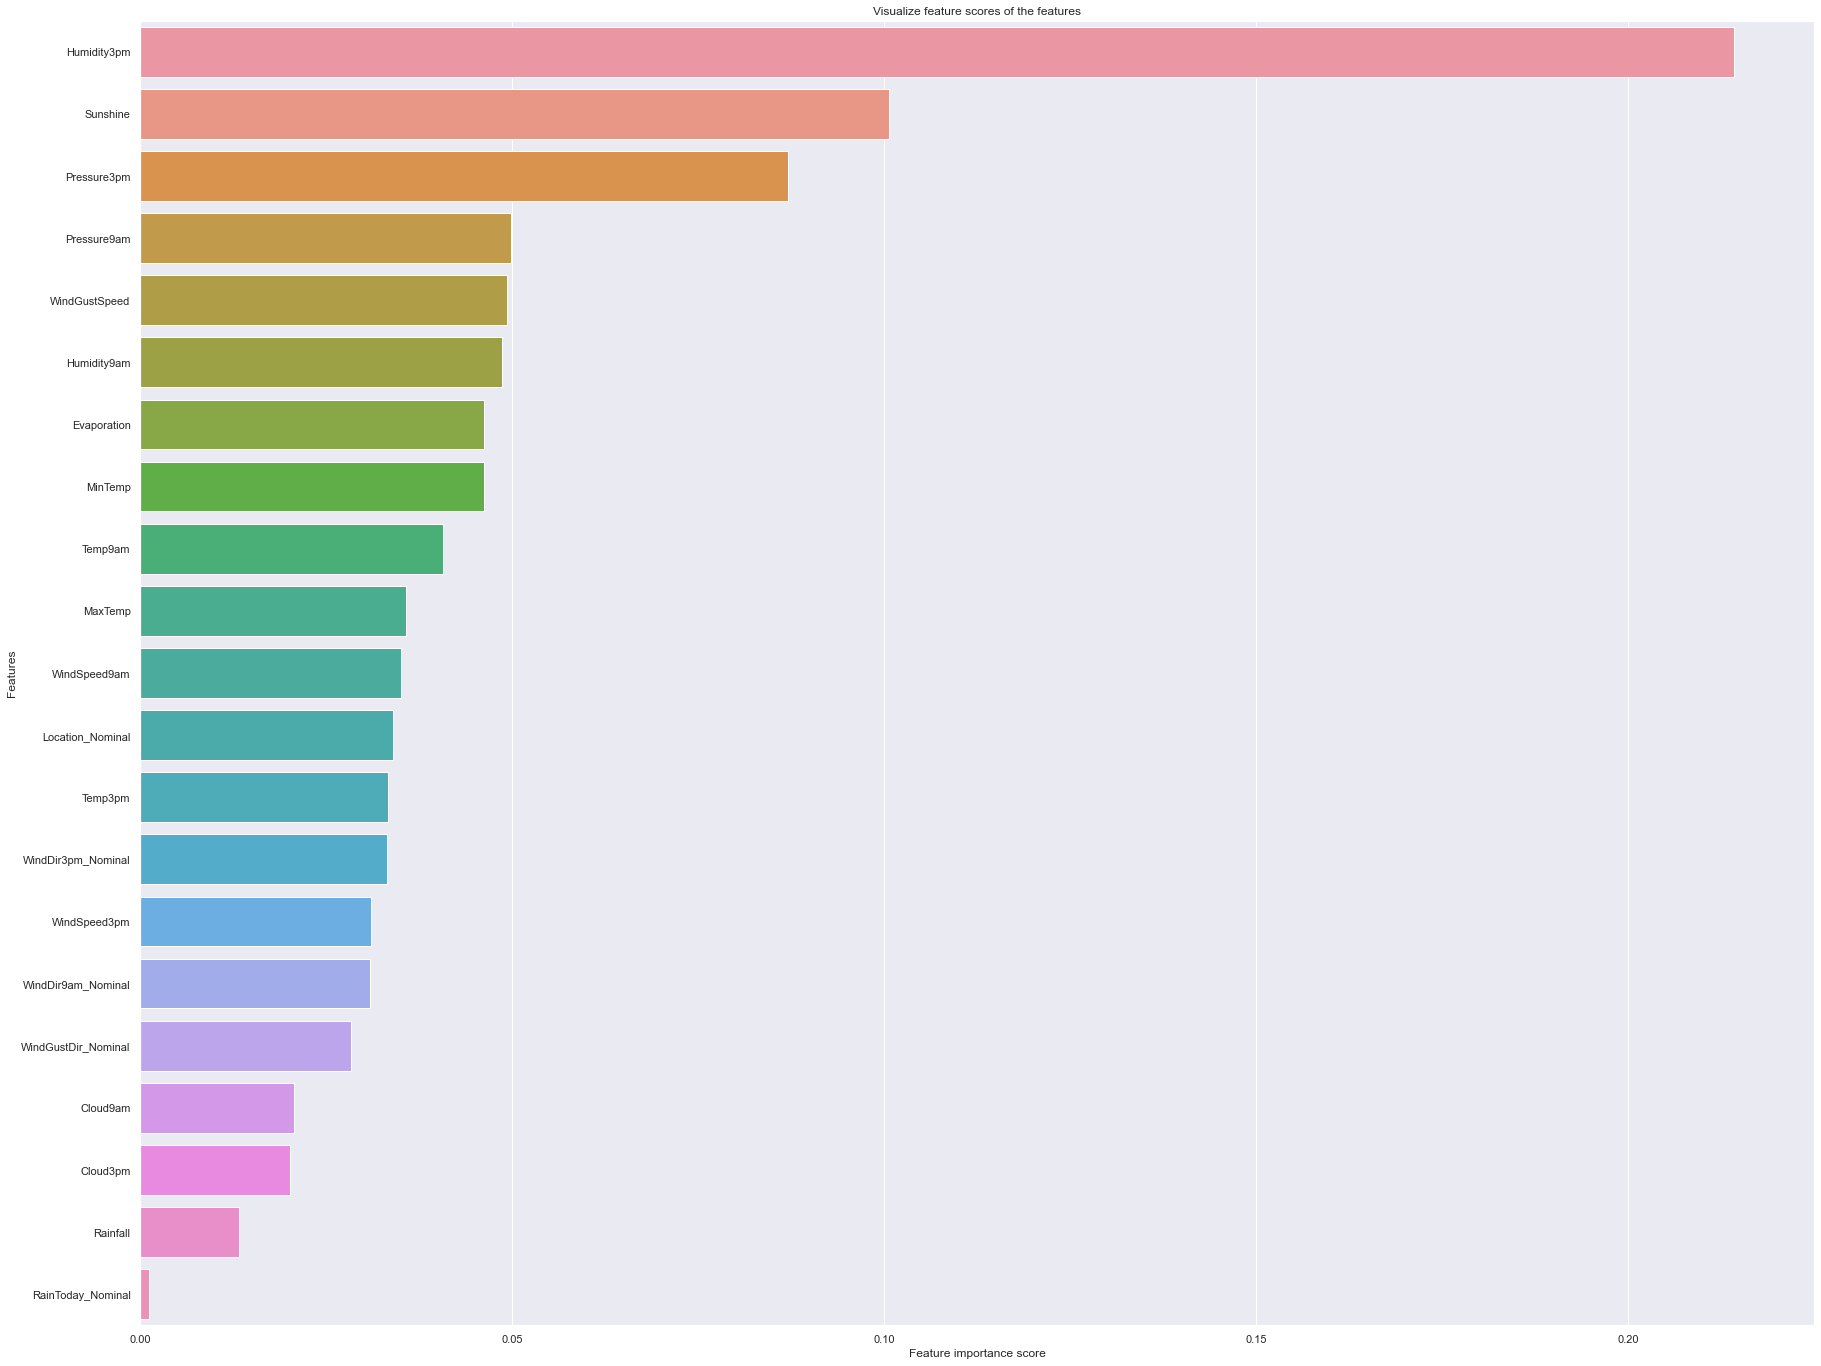

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X, y)
dt.feature_importances_
print(dt.feature_importances_)
sorted_idx = dt.feature_importances_.argsort()

print(sorted_idx)

# view the feature scores

feature_scores = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=weatherAUSData_noNA.T)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()


Based on feature importance plot, the most important variables in predicting RainTomorrow are Humidity3pm, Sunshine and Pressure3pm. This is slightly different from the variables I thought would be used to predict RainTomorrow, which were Evaporation, Humidity3pm, Pressure3pm, Cloud3pm and Temp3pm. I didn't have Sunshine as a variable of interest and I have more variables of interest.

#### Split data into test and training, standardize and balance data
I will now split the dataset into test (25%) and training (75%). I will use the stratify parameter on y to ensure that I have both target classes in the training set and test set. Next, I will standardize the dataset using StandardScalar. Finally, since my target class is imbalanced, I will balance my data using the SMOTENC package.

In [35]:
#reassigning X and y
X = weatherAUSData_noNA.drop(['RainTomorrow_Nominal'], axis = 1)
y = weatherAUSData_noNA[['RainTomorrow_Nominal']]

#splitting data into test and training data. Training set trains the model
#stratifying y to preserve the same proportions of each class as observed in the original dataset
#adding random state to re-produce the same results if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y,random_state = 42)

#standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#balance the data using SMOTENC 
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC([0,6,8,9,20], random_state = 101)
X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)

#### Implement algorithm
For my first attempt of this implementation, I will use the default parameters. From there, I will attempt to improve the accuracy once, by tuning a couple of parameters. Finally, I will implement GridSearchCV to find the best parameters. I will then use those parameters to fit the model again, and for this model, I will plot the feature importance graph to look at the important variables and compare it to the initial feature selection process and my variables of interest.

In [43]:
#importing packages for decision trees and and cross validation
from sklearn.model_selection import cross_val_score

#using default parameters
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_oversample, np.ravel(y_oversample, order = 'C'))

#printing accuracy scores of training and test set
print("\nAccuracy on training set: {:.3f}".format(tree.score(X_oversample, np.ravel(y_oversample, order = 'C'))))
print("\nAccuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#cross validation on training set
cv_scores_training = cross_val_score(tree, X_oversample, np.ravel(y_oversample,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_training)
print("CV accuracy on training set:", np.mean(cv_scores_training))

#cross validation on test set
cv_scores_test = cross_val_score(tree, X_test, np.ravel(y_test,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_test)
print("CV accuracy on test set:", np.mean(cv_scores_test))


Accuracy on training set: 1.000

Accuracy on test set: 0.800

 [0.75277035 0.79136416 0.87390141 0.86167367 0.87829576 0.86587696
 0.87179977 0.87848682 0.86986432 0.87005542]
CV accuracy on training set: 0.8514088635792915

 [0.82681018 0.82485323 0.83072407 0.82387476 0.81604697 0.8297456
 0.84050881 0.82876712 0.82778865 0.80117532]
CV accuracy on test set: 0.8250294692092284


Based on cross validation, my average accuracy score for my training set is 85.14% and for my test set, 82.50%.

In [44]:
#using max_features = 5, max_depth = 15 and everything else uses default parameters
tree = DecisionTreeClassifier(max_features = 5, max_depth = 15, random_state=1)
tree.fit(X_oversample, np.ravel(y_oversample, order = 'C'))

#printing accuracy scores of training and test set
print("\nAccuracy on training set: {:.3f}".format(tree.score(X_oversample, np.ravel(y_oversample, order = 'C'))))
print("\nAccuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#cross validation on training set
cv_scores_training = cross_val_score(tree, X_oversample, np.ravel(y_oversample,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_training)
print("CV accuracy on training set:", np.mean(cv_scores_training))

#cross validation on test set
cv_scores_test = cross_val_score(tree, X_test, np.ravel(y_test,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_test)
print("CV accuracy on test set:", np.mean(cv_scores_test))


Accuracy on training set: 0.932

Accuracy on test set: 0.787

 [0.76327856 0.78391288 0.85307604 0.83951089 0.85269392 0.85422239
 0.85269392 0.84486053 0.85495891 0.84272884]
CV accuracy on training set: 0.8341936891049067

 [0.84148728 0.82485323 0.82485323 0.83953033 0.83170254 0.8111546
 0.82876712 0.81996086 0.83463796 0.8374143 ]
CV accuracy on test set: 0.8294361462132785


For the second attempt, the cross validation training and test set accuracy scores declined to 83.42% and 82.94%. I will now implement GridSearchCV to figure out the best parameters.

In [233]:
#running Grid Search to figure out best model and parameters
from sklearn.model_selection import GridSearchCV

# define in the parameter values that should be search
# create a parameter grid:  map the parameter names to the value that should be search
param_grid = {
  'criterion' : ['gini','entropy'],
  'max_depth' : [10,15,20,25,30],
  'max_features': [3, 5, 7, 10, 12, 'auto']   
}


dtc = DecisionTreeClassifier(random_state=1)

# cv=10 in the GridSearchCV and initialize the grid
grid_dtc = GridSearchCV(dtc, param_grid = param_grid, cv = 10, scoring ='accuracy')

# fit your data before you can get the best parameter combination.
grid_dtc.fit(X_oversample, np.ravel(y_oversample, order = 'C'))
grid_dtc.cv_results_

{'mean_fit_time': array([0.06992476, 0.10106137, 0.13977473, 0.18322351, 0.22514229,
        0.08681211, 0.09154327, 0.14102986, 0.18500345, 0.2652045 ,
        0.35653362, 0.11268585, 0.11725805, 0.16335092, 0.20374467,
        0.26847208, 0.33780336, 0.12135201, 0.09991021, 0.14869385,
        0.19948447, 0.27774639, 0.35583203, 0.12347052, 0.10223339,
        0.14918895, 0.19950886, 0.28636327, 0.35237634, 0.13378627,
        0.08636882, 0.13190238, 0.17945304, 0.27558234, 0.3014961 ,
        0.10897684, 0.10860226, 0.16370115, 0.21388788, 0.29118564,
        0.35426662, 0.13189423, 0.11790628, 0.17302761, 0.2305841 ,
        0.30743177, 0.38113718, 0.14565265, 0.11655993, 0.17524412,
        0.22638731, 0.31965365, 0.44807391, 0.16428955, 0.13763866,
        0.19614551, 0.25578265, 0.31746356, 0.39928262, 0.15858316]),
 'std_fit_time': array([0.00529791, 0.0043564 , 0.00691297, 0.00291959, 0.00687194,
        0.0028241 , 0.00485338, 0.00531852, 0.01137417, 0.00738298,
        0.035

In [234]:
print("GridSearhCV best model:\n ")
print('The best score: ', grid_dtc.best_score_)
print('The best parameter:', grid_dtc.best_params_)
print('The best model estimator:', grid_dtc.best_estimator_)

GridSearhCV best model:
 
The best score:  0.8596818520600689
The best parameter: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 10}
The best model estimator: DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=10,
                       random_state=1)


Based on GridSearchCV, the best parameters for the model is using criterion = entropy, max_depth = 30, max_features = 10. I will now attempt to fit the model with these parameters.

In [45]:
#using parameters from GridSearchCV
tree = DecisionTreeClassifier(criterion='entropy', max_features = 10, max_depth = 30, random_state=1)
tree.fit(X_oversample, np.ravel(y_oversample, order = 'C'))

#printing accuracy scores of training and test set
print("\nAccuracy on training set: {:.3f}".format(tree.score(X_oversample, np.ravel(y_oversample, order = 'C'))))
print("\nAccuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#cross validation on training set
cv_scores_training = cross_val_score(tree, X_oversample, np.ravel(y_oversample,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_training)
print("CV accuracy on training set:", np.mean(cv_scores_training))

#cross validation on test set
cv_scores_test = cross_val_score(tree, X_test, np.ravel(y_test,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_test)
print("CV accuracy on test set:", np.mean(cv_scores_test))


Accuracy on training set: 1.000

Accuracy on test set: 0.813

 [0.7506687  0.79747803 0.88173481 0.88784868 0.87734047 0.88651127
 0.88880397 0.87829576 0.87158418 0.87655265]
CV accuracy on training set: 0.8596818520600689

 [0.81996086 0.84833659 0.82093933 0.82387476 0.8258317  0.81506849
 0.82485323 0.83365949 0.82876712 0.82468168]
CV accuracy on test set: 0.826597326975012


Confusion Matrix 
 [[7518 1205]
 [ 710  786]]


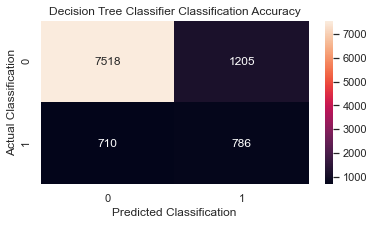

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix \n",cm)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True,fmt="d")
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('Decision Tree Classifier Classification Accuracy')
plt.show()

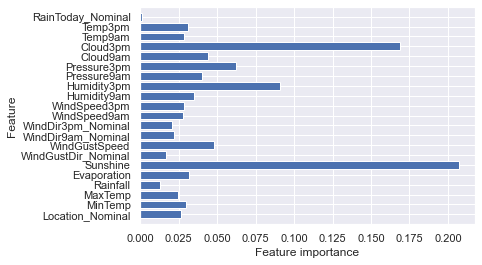

In [49]:
def plot_feature_importances_weatherAUS(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_weatherAUS(tree)

#### Short summary for Decision Trees
Overall, Decision Trees doesn't appear to be a great classifier algorithm to pedict if it will rain the next day as all the accuracy scores were below 90%. Prior to my implementation, I conducted feature selection as I wanted to see what were important variables in predicting the target variable and the feature importance plot indicated that only 3 variables were important and they were, Humidity3pm, Sunshine and Pressure3pm. This is slightly different from my initial assumption. I didn't have Sunshine as a variable of interest and I had 5 variables fo interest. For my first attempt, the cross validation accuracy scores were 85.14% for the training set and 82.50% for the test set. In this attempt, I used default parameters. In my second attempt, I decided to tune max_features and max_depth. I set max_features to 5 and max_depth to 15 and this time the cross validation accuracy scores were 83.42% for the training set and 82.94% for the test set. While the accuracy score of the training set declined, the accuracy of the test set increased slightly. Next, I performed GridSearchCV to figure out the best parameters. The parameters I decided to tune were criterion, max_depth and max_features. The GridSearchCV indicated that the best values for these parameters were criterion=entropy, max_depth=30 and max_features=10. I used these parameter values for my third attempt and this time my cross validation accuracy scores were 85.96% for the training set and 82.66% for the test test. This is an improvement from the first attempt. However, the test score declined slightly from the second attempt. I also decided to plot a feature importance graph to evaluate the important variables. For this model, the 2 important variables were Sunshine and Cloud3pm. Note that this is slightly different from the variables in the initial feature importance but the initial feature importance used default parameter values. For Decision Trees, I conclude that the 3rd model is the best model. While the test set accuracy is lower for the third attempt compared to the second attempt, the training set accuracy is higher. I believe this will be useful when I'm feeding new data into the model.

### Random Forest
Similar to Decision Trees, I favor Random Forest over classifiers such as k-NN and Naïve Bayes’ as Random Forest works well with categorical and quantitative data and I believe there is less data clean up or preparation I need to do for Random Forest. I would also favor Random Forest over Decision Trees as it is an ensemble algorithm and would be more robust that Decision Trees. Ensemble algorithms combines several base models in order to produce one optimal predictive model. For Random Forest, the algorithm is combining multiple decision trees with different subsets of features and data (through boostrapping). Each tree generates a class prediction and the class with the most votes becomes the model's prediction. This is much more effective than a single decision tree.

#### Prepare data: preprocessing transformations, data cleaning, dealing with null and outlier values.
Since Random Forest is similar to Decision Trees. I won't be redoing these steps. I will using X and y from prior implementation.

#### Conduct Feature Engineering and feature selection.
I will be conducting feature selection again, this time using feature importance built-in class in the Random Forest Classifier. I hypothesize that it will give me similar results to the feature importance for Decision Tree Classifier.

[0.03326325 0.0478789  0.04578814 0.0161215  0.04267042 0.10199792
 0.03062917 0.05169024 0.03272484 0.03158929 0.03251527 0.03387757
 0.04696278 0.13994902 0.06079671 0.0714723  0.02952808 0.05418189
 0.04670813 0.04753132 0.00212327]
[20  3 16  6  9 10  8  0 11  4  2 18 12 19  1  7 17 14 15  5 13]


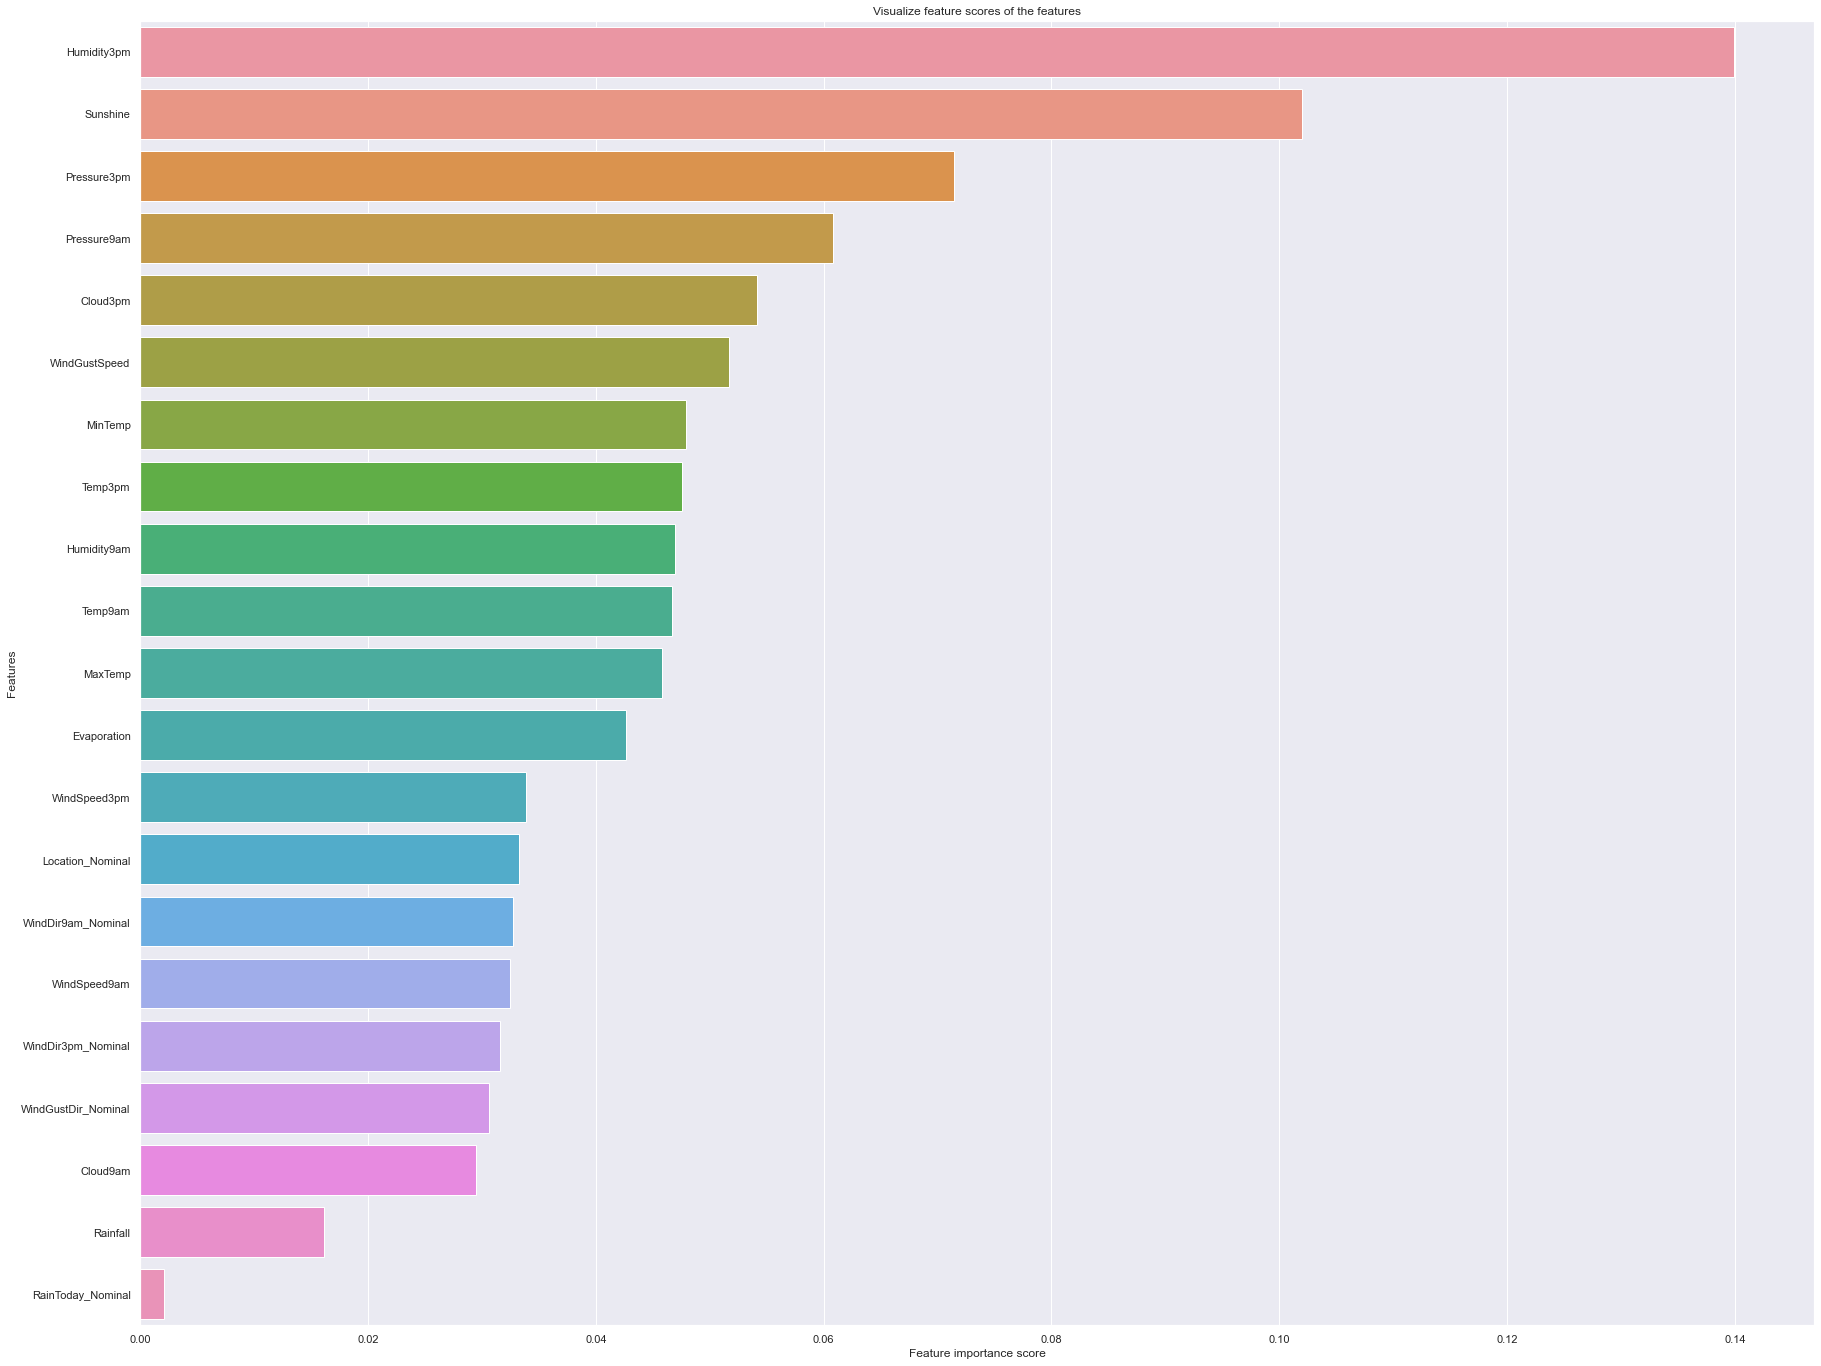

In [50]:
#reassigning X and y
X = weatherAUSData_noNA.drop(['RainTomorrow_Nominal'], axis = 1)
y = weatherAUSData_noNA[['RainTomorrow_Nominal']]

#importing Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X, np.ravel(y, order = 'C'))
rf.feature_importances_
print(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()

print(sorted_idx)

# view the feature scores

feature_scores = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=weatherAUSData_noNA.T)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

My hypothesis was correct. The Random Forest Classifier feature importance indicates that the 3 important varibles are Humidity3pm, Sunshine and Pressure3pm.

#### Split data into test and training, standardize and balance data
Since I have already split the data into test and training, standardize and balance the data for Decision Trees, I will be reusing the train and test sets for Random Forest.

#### Implement algorithm
Similar to Decision Trees, I will first attempt the implementation with default parameters. From there, I will attempt to improve the accuracy once, by tuning a couple of parameters. Finally, I will implement GridSearchCV to find the best parameters. I will then use those parameters to fit the model again, and for this model, I will plot the feature importance graph to look at the important variables.

In [51]:
forest = RandomForestClassifier(random_state = 1)
forest.fit(X_oversample, np.ravel(y_oversample, order = 'C'))
print("Accuracy on training set: {:.3f}".format(forest.score(X_oversample, np.ravel(y_oversample, order = 'C'))))
print("\nAccuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

#cross validation on training set
cv_scores_training = cross_val_score(forest, X_oversample, np.ravel(y_oversample,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_training)
print("CV accuracy on training set:", np.mean(cv_scores_training))

#cross validation on test set
cv_scores_test = cross_val_score(forest, X_test, np.ravel(y_test,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_test)
print("CV accuracy on test set:", np.mean(cv_scores_test))

Accuracy on training set: 1.000

Accuracy on test set: 0.870

 [0.86090944 0.88192587 0.94612151 0.94497516 0.94440199 0.94382881
 0.94077188 0.94956057 0.94744888 0.94381808]
CV accuracy on training set: 0.9303762183217363

 [0.88062622 0.89236791 0.88943249 0.87964775 0.88845401 0.87866928
 0.87964775 0.87964775 0.88747554 0.87267385]
CV accuracy on test set: 0.8828642538012883


Based on cross validation, my average accuracy score for my training set is 93.04% and for my test set, 88.29%.

Confusion Matrix 
 [[8046  677]
 [ 647  849]]


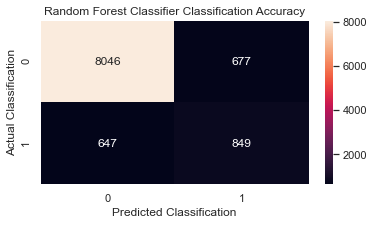

In [52]:
y_predict = forest.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix \n",cm)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True,fmt="d")
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('Random Forest Classifier Classification Accuracy')
plt.show()

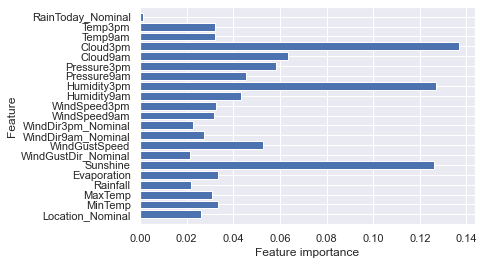

In [53]:
plot_feature_importances_weatherAUS(forest)

In [54]:
#changing n_estimators to 120 and max_depth to 5 and everything else will use default parameter values
forest = RandomForestClassifier(n_estimators = 120, max_depth = 5, random_state = 1)
forest.fit(X_oversample, np.ravel(y_oversample, order = 'C'))
print("Accuracy on training set: {:.3f}".format(forest.score(X_oversample, np.ravel(y_oversample, order = 'C'))))
print("\nAccuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

#cross validation on training set
cv_scores_training = cross_val_score(forest, X_oversample, np.ravel(y_oversample,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_training)
print("CV accuracy on training set:", np.mean(cv_scores_training))

#cross validation on test set
cv_scores_test = cross_val_score(forest, X_test, np.ravel(y_test,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_training)
print("CV accuracy on test set:", np.mean(cv_scores_test))

Accuracy on training set: 0.807

Accuracy on test set: 0.781

 [0.77894536 0.78066488 0.80932365 0.81047    0.80913259 0.81276271
 0.80378296 0.80512037 0.80756736 0.8098605 ]
CV accuracy on training set: 0.8027630383618961

 [0.77894536 0.78066488 0.80932365 0.81047    0.80913259 0.81276271
 0.80378296 0.80512037 0.80756736 0.8098605 ]
CV accuracy on test set: 0.8776784396556845


Based on cross validation, my average accuracy score for my training set declined to 80.28% and for my test set, 87.78%. I will now run GridSearchCV to figure out the best parameters.

In [249]:
# define in the parameter values that should be search
# create a parameter grid:  map the parameter names to the value that should be search
param_grid = {
  'n_estimators': [80, 100, 150, 200, 250, 300],
  'max_features': [8, 10, 'auto'],
  'max_depth' : [8,10,12,15]  
}

# use out-of-bag samples ("oob_score= True") to estimate the generalization accuracy.
rfc = RandomForestClassifier(bootstrap = True, n_jobs = -1, oob_score = True)

# cv=10 in the GridSearchCV and initialize the grid
grid_rfc = GridSearchCV(rfc, param_grid = param_grid, cv = 10, scoring ='accuracy')

# fit your data before you can get the best parameter combination.
grid_rfc.fit(X_oversample, np.ravel(y_oversample, order = 'C'))
grid_rfc.cv_results_

{'mean_fit_time': array([ 1.30727587,  1.64880707,  2.52945905,  4.48482106,  5.42690344,
         6.39053936,  2.80179794,  2.59856217,  3.85531406,  4.56028616,
         5.43625324,  6.45124159,  1.15841515,  1.33227677,  2.08650749,
         2.73312225,  3.35634682,  3.8856739 ,  2.036568  ,  2.53493328,
         3.58178563,  4.39752002,  5.63096449,  7.25017684,  2.48452809,
         3.23441763,  5.16646147,  7.98622952, 11.32784724, 12.66738257,
         1.78134668,  2.11239574,  2.93859775,  4.64774547,  7.55400169,
         6.69985461,  2.45737426,  3.00989304,  5.17791059,  5.34516995,
         6.76064231,  7.93922935,  2.57199564,  3.147633  ,  4.62528811,
         5.81216733,  7.40623114,  8.95496333,  1.40029099,  1.72856259,
         2.41150622,  3.33380692,  4.24834142,  5.31955597,  2.66477401,
         3.4995626 ,  4.89713607,  6.19418256,  7.63823538,  8.41316037,
         2.89802539,  3.52375958,  5.19215109,  6.71110647,  8.9676307 ,
        10.81360493,  1.61828384, 

In [250]:
print("GridSearhCV best model:\n ")
print('The best score: ', grid_rfc.best_score_)
print('The best parameter:', grid_rfc.best_params_)
print('The best model estimator:', grid_rfc.best_estimator_)

GridSearhCV best model:
 
The best score:  0.9172883009787466
The best parameter: {'max_depth': 15, 'max_features': 8, 'n_estimators': 300}
The best model estimator: RandomForestClassifier(max_depth=15, max_features=8, n_estimators=300,
                       n_jobs=-1, oob_score=True)


Based on GridSearchCV, the best parameters for the model is using max_depth = 15, max_features = 8 and n_estimators = 300. I will now attempt to fit the model with these parameters.

In [55]:
#fitting Random Forest with parameter values from GridSearchCV
forest = RandomForestClassifier(n_estimators = 300, max_depth = 15, max_features = 8, random_state = 1)
forest.fit(X_oversample, np.ravel(y_oversample, order = 'C'))
print("Accuracy on training set: {:.3f}".format(forest.score(X_oversample, np.ravel(y_oversample, order = 'C'))))
print("\nAccuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

#cross validation on training set
cv_scores_training = cross_val_score(forest, X_oversample, np.ravel(y_oversample,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_training)
print("CV accuracy on training set:", np.mean(cv_scores_training))

#cross validation on test set
cv_scores_test = cross_val_score(forest, X_test, np.ravel(y_test,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_training)
print("CV accuracy on test set:", np.mean(cv_scores_test))

Accuracy on training set: 0.980

Accuracy on test set: 0.856

 [0.83683607 0.86683225 0.93045472 0.93121895 0.93083684 0.93389377
 0.92739778 0.93714177 0.9352188  0.931588  ]
CV accuracy on training set: 0.9161418954299385

 [0.83683607 0.86683225 0.93045472 0.93121895 0.93083684 0.93389377
 0.92739778 0.93714177 0.9352188  0.931588  ]
CV accuracy on test set: 0.8828642538012883


Confusion Matrix 
 [[7818  905]
 [ 563  933]]


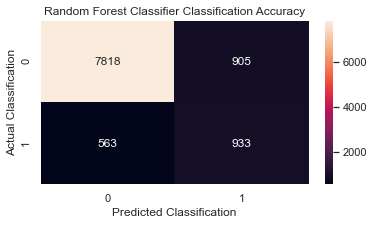

In [56]:
y_predict = forest.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix \n",cm)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True,fmt="d")
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('Random Forest Classifier Classification Accuracy')
plt.show()

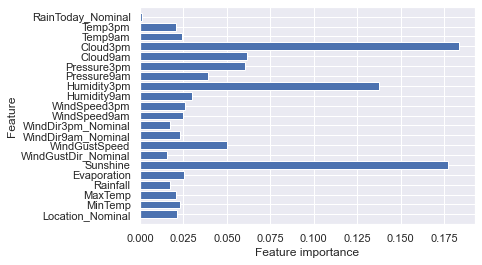

In [57]:
plot_feature_importances_weatherAUS(forest)

#### Short summary for Random Forest
As expected, Random Forest performed better than Decision Trees. Prior to my implementation, I conducted feature selection as I wanted to see if it will produce a different result from Decision Trees. It produced the same results, the 3 important variables in predicting if it will rain the next day are Humidity3pm, Sunshine and Pressure3pm. For my first attempt, the cross validation accuracy scores were 93.04% for the training set and 88.29% for the test set. In this attempt, I used default parameters. In my second attempt, I decided to tune n_estimators and max_depth. I set n_estimators to 120 and max_depth to 5 and this time the cross validation accuracy scores were 80.28% for the training set and 87.77% for the test set. The scores are lower compared to the first attempt. Next, I performed GridSearchCV to figure out the best parameters. The parameters I decided to tune were n_estimators, max_features and max_depth. The GridSearchCV indicated that the best values for these parameters were n_estimators=300, max_features=8 and max_depth=15. I used these parameter values for my third attmept and this time my cross validation accuracy scores were 91.61% for the training set and 88.29% for the test set. This is an improvement from the second attempt but the test accuracy score is the same as the first attempt. For Random Forest, I conclude that the first attempt is the best model. The feature importance plot for the first model indicated that the important variables were Cloud3pm, Humidity3pm and Sunshine. This is slightly different from the Decision Tree model where there were only 2 important variables, Sunshine and Cloud3pm.

### Gradient Boosting
Similar to Decision Trees and Random Forest, I favor Gradient Boosting over classifiers such as k-NN and Naïve Bayes as Gradient Boosting works well with categorical and quantitative data and I believe there is less data clean up or preparation I need to do for Gradient Boosting. I would also favor Gradient Boosting over Decision Trees as it is an ensemble algorithm. Gradient Boosting operates differently than Random Forest. Rather than creating multiple decision trees as the same time, Gradient Boosting creates the trees sequentially, where the newer decision trees are added to correct errors made by previously trained trees which leads to reducing the residual error of the model.

#### Prepare data: preprocessing transformations, data cleaning, dealing with null and outlier values.
Since Gradient Boosting is similar to Decision Trees and Random Forest. I won't be redoing these steps. I will be using X and y from prior implementation.

#### Conduct Feature Engineering and feature selection.
I will be conducting feature selection again, this time using the feature importance built-in class in the Gradient Boosting Classifier. I hypothesize that it will give me similar results to the feature importance for Decision Tree Classifier and Random Forest Classifier.

[0.01464129 0.00886113 0.00306302 0.00370372 0.00429407 0.20386569
 0.00662936 0.06424272 0.0147771  0.00438782 0.00215607 0.00660426
 0.00353187 0.47818605 0.00420344 0.126078   0.00251976 0.04188264
 0.0037274  0.00264457 0.        ]
[20 10 16 19  2 12  3 18 14  4  9 11  6  1  0  8 17  7 15  5 13]


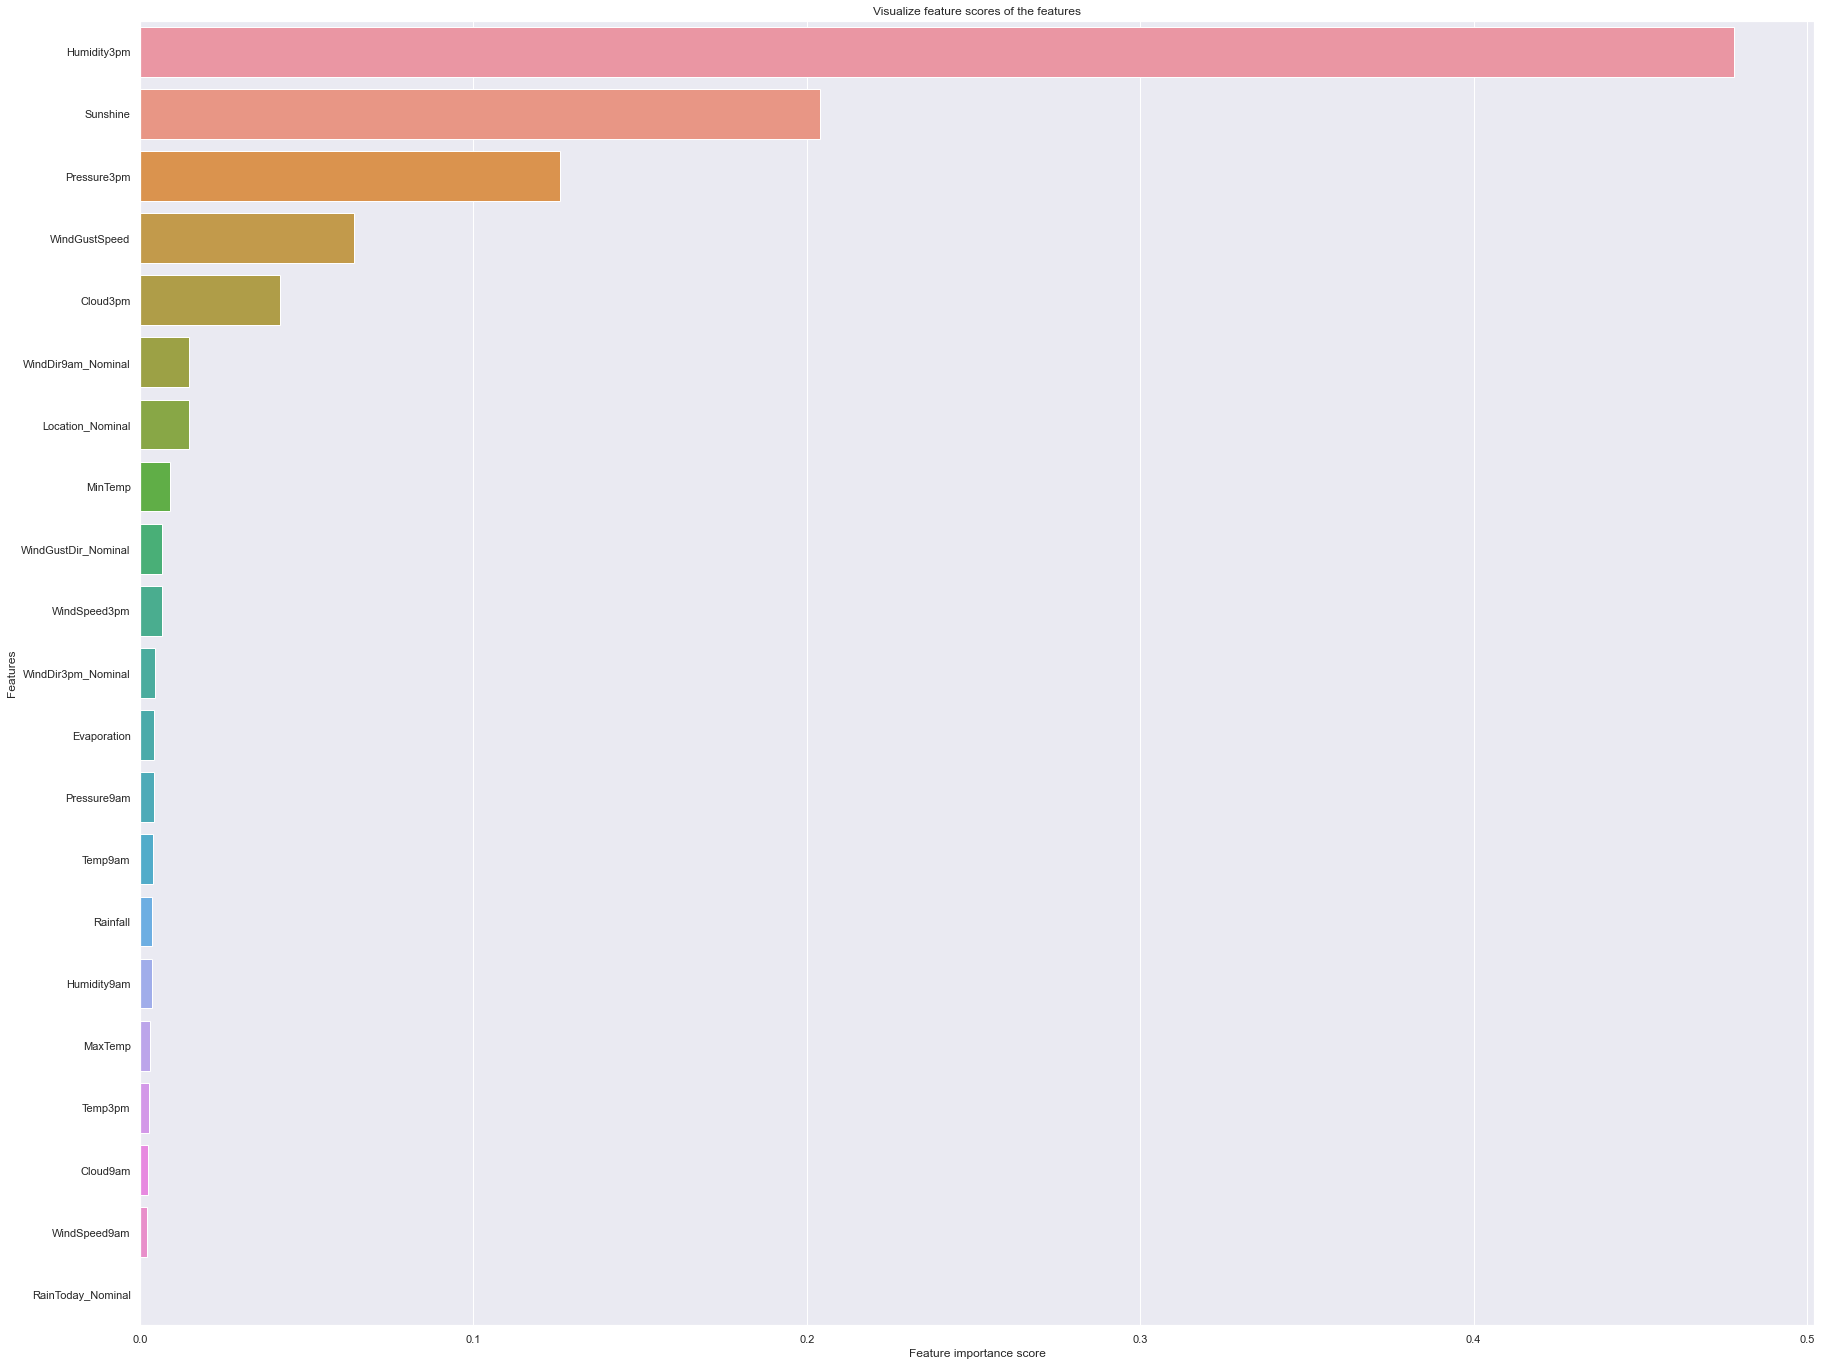

In [58]:
#reassigning X and y
X = weatherAUSData_noNA.drop(['RainTomorrow_Nominal'], axis = 1)
y = weatherAUSData_noNA[['RainTomorrow_Nominal']]

#importing Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier 

gb = GradientBoostingClassifier(random_state=1)
gb.fit(X, np.ravel(y, order = 'C'))
gb.feature_importances_
print(gb.feature_importances_)
sorted_idx = gb.feature_importances_.argsort()

print(sorted_idx)

# view the feature scores

feature_scores = pd.Series(gb.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=weatherAUSData_noNA.T)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

My hypothesis was correct. Just like the Decision Tree Classifier and the Random Forest Classifier, the Gradient Boosting Classifier feature importance indicates that the 3 important varibles are Humidity3pm, Sunshine and Pressure3pm.

#### Split data into test and training, standardize and balance data
Since I have already split the data into test and training, standardize and balance the data for Decision Trees, I will be reusing the training and test sets for Gradient Boosting.

#### Implement algorithm
Similar to Decision Trees and Random Forest, I will first attempt the implementation with default parameters. From there, I will attempt to improve the accuracy once, by tuning a couple of parameters. Finally, I will implement GridSearchCV to find the best parameters. I will then use those parameters to fit the model again and I will plot the feature importance graph to look at the important variables.

In [59]:
#using default parameter values
gb = GradientBoostingClassifier(random_state = 1)
gb.fit(X_oversample, np.ravel(y_oversample, order = 'C'))
print("Accuracy on training set: {:.3f}".format(gb.score(X_oversample, np.ravel(y_oversample, order = 'C'))))
print("\nAccuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

#cross validation on training set
cv_scores_training = cross_val_score(gb, X_oversample, np.ravel(y_oversample,order='C'), cv=10, n_jobs = -1)

#print each cv score (accuracy) and average them
print("\n", cv_scores_training)
print("CV accuracy on training set:", np.mean(cv_scores_training))

#cross validation on test set
cv_scores_test = cross_val_score(gb, X_test, np.ravel(y_test,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_test)
print("CV accuracy on test set:", np.mean(cv_scores_test))

Accuracy on training set: 0.890

Accuracy on test set: 0.845

 [0.74455483 0.79766909 0.9130684  0.91555216 0.91058464 0.91478793
 0.90714559 0.9107757  0.90751003 0.91037646]
CV accuracy on training set: 0.883202481591318

 [0.88062622 0.88943249 0.88062622 0.87964775 0.89334638 0.87866928
 0.87964775 0.88258317 0.88943249 0.87365328]
CV accuracy on test set: 0.8827665022779938


Based on cross validation, my average accuracy score for my training set is 88.32% and for my test set, 88.28%.

In [60]:
#setting n_estimators to 150, max depth to 5 and everything else set to default parameter values
gb = GradientBoostingClassifier(n_estimators = 150, max_depth = 5, random_state = 1)
gb.fit(X_oversample, np.ravel(y_oversample, order = 'C'))
print("Accuracy on training set: {:.3f}".format(gb.score(X_oversample, np.ravel(y_oversample, order = 'C'))))
print("\nAccuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

#cross validation on training set
cv_scores_training = cross_val_score(gb, X_oversample, np.ravel(y_oversample,order='C'), cv=10, n_jobs = -1)

#print each cv score (accuracy) and average them
print("\n", cv_scores_training)
print("CV accuracy on training set:", np.mean(cv_scores_training))

#cross validation on test set
cv_scores_test = cross_val_score(gb, X_test, np.ravel(y_test,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_test)
print("CV accuracy on test set:", np.mean(cv_scores_test))

Accuracy on training set: 0.938

Accuracy on test set: 0.877

 [0.66889568 0.77397784 0.96790218 0.96694689 0.96560948 0.96637371
 0.96178831 0.97172335 0.9694248  0.96464743]
CV accuracy on training set: 0.9177289658432155

 [0.88454012 0.88551859 0.8776908  0.87964775 0.89334638 0.87181996
 0.87573386 0.8816047  0.88551859 0.86679726]
CV accuracy on test set: 0.880221800123052


Based on cross validation, my average accuracy score for my training set improved to 91.77% and for my test set, it declined to 88.02%. I will now run GridSearchCV to figure out the best parameters.

In [334]:
# define in the parameter values that should be search
# create a parameter grid:  map the parameter names to the value that should be search
param_grid = {
  'n_estimators': [100, 200, 300],
  'learning_rate': [0.075, 0.1, 0.15],
  'max_depth' : [10,12,15] ,
  'max_features' : [8, 10, 'auto'] 
}

# leaving everything else as default
gbrt = GradientBoostingClassifier()

# cv=5 in the GridSearchCV and initialize the grid
grid_gbrt = GridSearchCV(gbrt, param_grid = param_grid, cv = 5, n_jobs = -1, scoring ='accuracy')

# fit your data before you can get the best parameter combination.
grid_gbrt.fit(X_oversample, np.ravel(y_oversample, order = 'C'))
grid_gbrt.cv_results_

{'mean_fit_time': array([ 50.96087461, 121.09885602, 179.68783708,  78.86552467,
        135.42056303, 325.79575753, 256.66994171, 378.78373871,
        389.39919481,  80.58429613, 154.39029021, 224.99453797,
         90.4453578 , 174.07485399, 253.06862531, 155.78889441,
        281.65243235, 427.26188927, 131.79951134, 274.721878  ,
        400.87574091, 159.084582  , 280.13976893, 408.32113996,
        201.58154244, 416.00720582, 625.28013892,  53.23829279,
        105.35794311, 153.92997522,  61.0366015 , 125.83320045,
        188.67432914, 118.18945818, 216.19382534, 322.3615202 ,
         67.33780313, 133.69185343, 203.38539205,  78.89310617,
        162.13124609, 247.57728   , 147.3585268 , 282.31772923,
        406.68076229, 129.49682322, 241.34550762, 371.45719676,
        143.65467834, 288.0421381 , 423.20161824, 214.9226017 ,
        412.02600446, 594.58798413,  54.47895498, 101.79981503,
        142.17405171,  56.91688256, 113.30523062, 170.17598343,
        108.15120082, 2

In [335]:
print("GridSearhCV best model:\n ")
print('The best score: ', grid_gbrt.best_score_)
print('The best parameter:', grid_gbrt.best_params_)
print('The best model estimator:', grid_gbrt.best_estimator_)

GridSearhCV best model:
 
The best score:  0.9250462550587963
The best parameter: {'learning_rate': 0.075, 'max_depth': 15, 'max_features': 8, 'n_estimators': 100}
The best model estimator: GradientBoostingClassifier(learning_rate=0.075, max_depth=15, max_features=8)


Based on GridSearchCV for Gradient Boosting, the best parameter values are learning_rate=0.075, max_depth=15, max_features=8 and n_estimators=100. I will now implement the alogorithm again using these parameter values.

In [61]:
#run algorithm again with paramater values from GridSearchCV
gb = GradientBoostingClassifier(n_estimators = 100, max_depth = 15, learning_rate = 0.075, max_features = 8, random_state = 1)
gb.fit(X_oversample, np.ravel(y_oversample, order = 'C'))
print("Accuracy on training set: {:.3f}".format(gb.score(X_oversample, np.ravel(y_oversample, order = 'C'))))
print("\nAccuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

#cross validation on training set
cv_scores_training = cross_val_score(gb, X_oversample, np.ravel(y_oversample,order='C'), cv=10, n_jobs = -1)

#print each cv score (accuracy) and average them
print("\n", cv_scores_training)
print("CV accuracy on training set:", np.mean(cv_scores_training))

#cross validation on test set
cv_scores_test = cross_val_score(gb, X_test, np.ravel(y_test,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_test)
print("CV accuracy on test set:", np.mean(cv_scores_test))

Accuracy on training set: 1.000

Accuracy on test set: 0.883

 [0.79537639 0.86033626 0.9650363  0.96560948 0.96484524 0.96427207
 0.96197937 0.96847535 0.96694057 0.96158991]
CV accuracy on training set: 0.937446093436753

 [0.88454012 0.88747554 0.8816047  0.88356164 0.89334638 0.87279843
 0.88356164 0.87964775 0.88356164 0.88148874]
CV accuracy on test set: 0.8831586583890931


Confusion Matrix 
 [[8290  433]
 [ 762  734]]


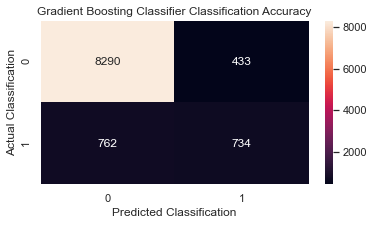

In [62]:
y_predict = gb.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix \n",cm)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True,fmt="d")
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('Gradient Boosting Classifier Classification Accuracy')
plt.show()

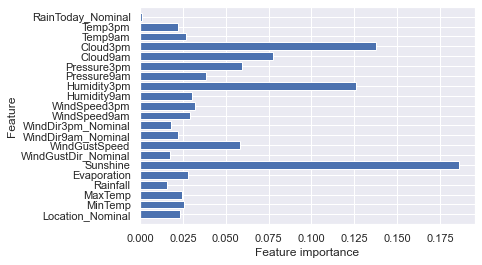

In [63]:
plot_feature_importances_weatherAUS(gb)

#### Short summary for Gradient Boosting
Gradient Boosting performed slightly better than Random Forest and is significantly better than Decision Tree. Similar to Random Forest, I re-ran the feature selection for Gradient Boosting Classifier as I wanted to see if it will produce a different result from Decision Trees and Random Forest. It produced the same results, the 3 important variables in predicting if it will rain the next day are Humidity3pm, Sunshine and Pressure3pm. For my first attempt, the cross validation accuracy scores were 88.32% for the training set and 88.28% for the test set. In this attempt, I used default parameters. In my second attempt, I decided to tune n_estimators and max_depth.  I decided to set n_estimators to 150 and max_depth to 5 and this time the cross validation accuracy scores were 91.77% for the training set and 88.02% for the test set. The training set accuracy score is higher for this attempt but lower for the test set. Next, I performed GridSearchCV to figure to the best parameters. The parameters I decided to tune were n_estimators, learning_rate, max_features and max_depth. The GridSearchCV indicated that the best values for these parameters were n_estimators=100, learning_rate=0.075, max_features=8 and max_depth=15. I used these parameter values for my third attempt and this time my cross validation accuracy scores were 93.74% for the training set and 88.32% for the test test. This is an improvement from the second attempt but the test set accuracy score is the same as the first attempt. I also decided to plot a feature importance graph to evaluate the important variables. The important variables are the same as the Decision Tree and Random Forest model, which were Sunshine, Cloud3pm and Humidity3pm. Similar to the Decision Tree model, Sunshine is the most important variable in the Gradient Boosting model. I conclude that the best model is the third attempt.

### k Nearest Neighbor  (k-NN)
The fourth classifier I will be implementing is k Nearest Neighbor, k-NN. Unlike Tree Classifiers, k-NN is lazy learner, where no model is created. Similar to Tree Classifiers, k-NN is non parametric where there is no assumption that needs to be made about the underlying data distribution. k-NN works well with correlated predictor variables and works better with quantitative variables. Fortunately, I have many quantitative variables in the dataset and I will be using those for this implementation.

#### Conduct Feature Engineering and feature selection.
Unfortunately, the KNeighborsClassifier doesn't have a feature importance built-in class. The feature selection method I am using for this algorithm is the correlation coefficient heatmap. I will be using the heatmap to determine which variables are correlated.

<AxesSubplot:>

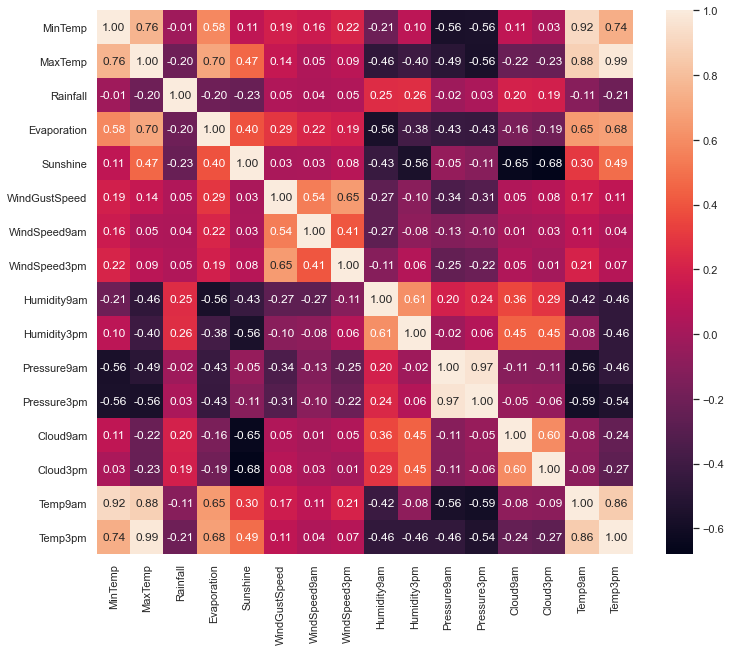

In [64]:
#correlation coeeficient heatmap for numerical variables
numerical_variables = weatherAUSData_noNA[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed',
                                           'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
                                           'Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]

plt.figure(figsize=(12,10))
sns.heatmap(numerical_variables.corr(),annot=True,fmt='.2f')

Based on the heatmap, it looks like all the quantitative variables are correlated at least with one other variable, except for Rainfall. Quantitative variables with strong correlation are:

1. MinTemp and MaxTemp (0.76)
2. Evaporation and MaxTemp (0.70)
3. Temp9am and MinTemp (0.92)
4. Temp3pm and MinTemp (0.74)
5. Temp9am and MaxTemp (0.88)
6. Temp3pm and MaxTemp (0.99)
7. Pressure9am and Pressure3pm (0.97)
8. Temp9am and Temp3pm (0.86)

#### Prepare data: preprocessing transformations, data cleaning, dealing with null and outlier values.
k-NN is sensitive to noisy data and outliers. Since these were already dropped for Tree Classifiers, I won't have to redo this.

#### Split data into test and training, standardize and balance data
k-NN's performance won't degrade if we have imbalance data, therefore I will be skipping this step. I will split the data into test (25%) and training (75%). I will use the stratify parameter on y to ensure that I have both target classes in the training set and test set. Next, I will standardize the dataset using StandardScalar and transform the data.

In [65]:
#dropping non numerical variables and rainfall for X
knn_X = weatherAUSData_noNA.drop(['Location_Nominal','Rainfall','WindGustDir_Nominal','WindDir9am_Nominal',
                                  'WindDir3pm_Nominal','RainToday_Nominal','RainTomorrow_Nominal'], axis = 1)
knn_y = weatherAUSData_noNA[['RainTomorrow_Nominal']]

#splitting data into test and training data. Training set trains the model
#stratifying y to preserve the same proportions of each class as observed in the original dataset
#adding random state to re-produce the same results if needed
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, knn_y, test_size = 0.25, stratify = knn_y,random_state = 42)

#standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(knn_X_train)

knn_X_train = scaler.transform(knn_X_train)
knn_X_test = scaler.transform(knn_X_test)

#### Implement algorithm
First, I will use a for loop to determine the optimal number of neighbors, k. Once I have determined the optimal number of neighbors, I will implement the algorithm with that number of neighbors. I will then use GridSearchCV to figure out the best parameter values. Next, I will implement the algorithm again using the those parameter values.

[0.8436246208043839, 0.8683824248948038, 0.8658381446325473, 0.8725902730208436, 0.8711224190233878, 0.8764066934142284, 0.874155983951463, 0.8758195518152461, 0.8744495547509541, 0.8764066934142284, 0.8747431255504452, 0.8761131226147373, 0.8765045503473922, 0.8763088364810647, 0.8768959780800469, 0.8771895488795382, 0.8797338291417947, 0.8773852627458656, 0.8785595459438301, 0.8776788335453567, 0.8770916919463744, 0.8765045503473922, 0.8778745474116841, 0.8787552598101576, 0.8787552598101576, 0.8784616890106665, 0.8787552598101576, 0.8778745474116841, 0.8792445444759761, 0.8779724043448478, 0.8791466875428124, 0.8775809766121929, 0.8790488306096487, 0.878265975144339, 0.8786574028769938, 0.8780702612780116, 0.8793424014091399, 0.878265975144339, 0.878950973676485, 0.8781681182111752]


Text(0, 0.5, 'Testing Accuracy')

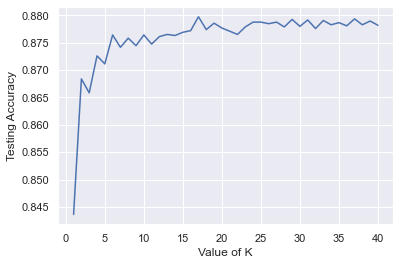

In [66]:
#importing Knn packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#for loop for figure out the optimal k

#looking through range 1 to 40
k_range = range(1, 41)

#empty list where accuracy scores will be appended to
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(knn_X_train,np.ravel(knn_y_train, order = 'C'))
    knn_y_pred = knn.predict(knn_X_test)
    scores.append(accuracy_score(knn_y_test, knn_y_pred))
    
#Printing the k number of negihbors and testing accuracy.
print(scores)


#plotting the accuracy score
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')

The for loop is using the Euclidean distance. Based on the accuracy scores for neighbors, 1 to 40, it looks like the optimal k number is 17. At k = 17, the accuracy score is 0.8797.

In [67]:
#implementing algorithm with k = 17
classifier = KNeighborsClassifier(n_neighbors = 17)
classifier.fit(knn_X_train, np.ravel(knn_y_train,order='C'))

knn_y_pred = classifier.predict(knn_X_test)
knn_y_pred

from sklearn.metrics import classification_report, confusion_matrix

#print accuracy score
accuracy =  accuracy_score(knn_y_test,knn_y_pred)*100
print("Accuracy on knn test data: {:.2f} %".format(accuracy))

#print classification report and confusion matrix
print(classification_report(knn_y_test, knn_y_pred))
cm = confusion_matrix(knn_y_test, knn_y_pred)
print("Confusion Matrix \n",cm)

#cross validation cv=10
#cross validation on training set
knn_cv_scores_training = cross_val_score(classifier, knn_X_train, np.ravel(knn_y_train,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", knn_cv_scores_training)
print("CV accuracy on training set:", np.mean(knn_cv_scores_training))

#cross validation on test set
knn_cv_scores_test = cross_val_score(classifier, knn_X_test, np.ravel(knn_y_test,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", knn_cv_scores_test)
print("CV accuracy on test set:", np.mean(knn_cv_scores_test))

Accuracy on knn test data: 87.97 %
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      8723
         1.0       0.73      0.28      0.41      1496

    accuracy                           0.88     10219
   macro avg       0.81      0.63      0.67     10219
weighted avg       0.87      0.88      0.86     10219

Confusion Matrix 
 [[8570  153]
 [1076  420]]

 [0.87606001 0.87932159 0.88030007 0.87703849 0.87638617 0.87573386
 0.87340946 0.88352365 0.87406199 0.88189233]
CV accuracy on training set: 0.8777727621473851

 [0.8776908  0.88258317 0.87964775 0.87181996 0.8816047  0.86888454
 0.87279843 0.87475538 0.88356164 0.87855044]
CV accuracy on test set: 0.8771896820392117


Based on my first attempt, the cross validation accuracy score for the training set is 87.78% and 87.72% for the test set. I will now implement GridSearchCV to figure out the best parameter values.

In [288]:
# define in the parameter values that should be search
# create a parameter grid:  map the parameter names to the value that should be search
param_grid = {
  'n_neighbors': [10, 15, 17, 20],
  'weights': ['uniform', 'distance'],
  'metric' : ['euclidean','manhattan','correlation']  
}

# cv=10 in the GridSearchCV and initialize the grid
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 1, cv = 10, n_jobs = -1, scoring ='accuracy')

# fit your data before you can get the best parameter combination.
grid_knn.fit(knn_X_train, np.ravel(knn_y_train, order = 'C'))
grid_knn.cv_results_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


{'mean_fit_time': array([0.10378237, 0.07855814, 0.08990817, 0.10420711, 0.09226968,
        0.09314938, 0.09964163, 0.10268362, 0.10480018, 0.09933245,
        0.09389071, 0.09589944, 0.09782083, 0.10252275, 0.09843047,
        0.1053803 , 0.01251879, 0.05743508, 0.04301658, 0.21294513,
        0.03240912, 0.05541122, 0.02751861, 0.04450979]),
 'std_fit_time': array([0.00384127, 0.02829111, 0.02109879, 0.03194151, 0.02076943,
        0.01515689, 0.0095297 , 0.01288347, 0.01035817, 0.00894647,
        0.00806064, 0.00666545, 0.00633367, 0.00981887, 0.00743896,
        0.01389034, 0.00174276, 0.07829479, 0.02484059, 0.28305669,
        0.00869328, 0.03360622, 0.00240179, 0.03578619]),
 'mean_score_time': array([ 5.16840041,  4.88819675,  5.59637725,  5.45668926,  5.78473153,
         5.38473823,  5.97521269,  5.93267207,  9.45506265,  9.08022494,
         9.66334825,  9.79772308, 10.39733386, 10.15245352, 10.49067559,
        10.25523231, 33.96989567, 28.98189552, 42.7875978 , 25.850473

In [289]:
print("GridSearhCV best model:\n ")
print('The best score: ', grid_knn.best_score_)
print('The best parameter:', grid_knn.best_params_)
print('The best model estimator:', grid_knn.best_estimator_)

GridSearhCV best model:
 
The best score:  0.8787838727973704
The best parameter: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}
The best model estimator: KNeighborsClassifier(metric='euclidean', n_neighbors=20, weights='distance')


Based on the GridSearchCV, the best parameter values are metric=euclidean, n_neighbors=20 and weights=distance. I will implement the algorithm again with these parameters.

Accuracy on knn test data: 87.93 %
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      8723
         1.0       0.73      0.28      0.40      1496

    accuracy                           0.88     10219
   macro avg       0.81      0.63      0.67     10219
weighted avg       0.86      0.88      0.86     10219

Confusion Matrix 
 [[8567  156]
 [1077  419]]


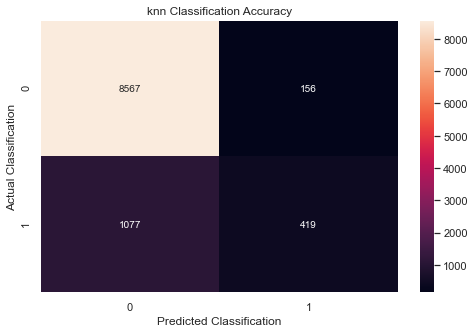


 [0.8776908  0.88193085 0.88258317 0.87801696 0.87866928 0.8754077
 0.87145188 0.88319739 0.87732463 0.88156607]
CV accuracy on training set: 0.8787838727973704

 [0.87964775 0.88551859 0.8776908  0.87181996 0.88258317 0.87475538
 0.87671233 0.87181996 0.88258317 0.87659158]
CV accuracy on test set: 0.8779722692345289


In [68]:
#implementing algorithm with k = 20 and weights = distance
classifier = KNeighborsClassifier(n_neighbors = 20, weights='distance')
classifier.fit(knn_X_train, np.ravel(knn_y_train,order='C'))

knn_y_pred = classifier.predict(knn_X_test)
knn_y_pred

#print accuracy score
accuracy =  accuracy_score(knn_y_test,knn_y_pred)*100
print("Accuracy on knn test data: {:.2f} %".format(accuracy))

#print classification report and confusion matrix
print(classification_report(knn_y_test, knn_y_pred))
cm = confusion_matrix(knn_y_test, knn_y_pred)
print("Confusion Matrix \n",cm)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('knn Classification Accuracy')
plt.show()

#cross validation cv=10
#cross validation on training set
knn_cv_scores_training = cross_val_score(classifier, knn_X_train, np.ravel(knn_y_train,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", knn_cv_scores_training)
print("CV accuracy on training set:", np.mean(knn_cv_scores_training))

#cross validation on test set
knn_cv_scores_test = cross_val_score(classifier, knn_X_test, np.ravel(knn_y_test,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", knn_cv_scores_test)
print("CV accuracy on test set:", np.mean(knn_cv_scores_test))

Based on my second attempt, the cross validation accuracy score for the training set is 87.87% and 87.79% for the test set. This is a slight improvement from the first attempt.

#### Short summary for k-NN
k-NN performed better than Decision Tree but worse than Random Forest and Gradient Boosting. Since there is no built-in class for feature importance, I used the correlation coefficient heatmap to figure out the best variables for k-NN algorithm. Out of all the quantitative variables, Rainfall was the only variable that wasn't correlated to at least one other quantitative variable. For my first attempt, I used k = 17 and the cross validation accuracy scores were 87.78% for the training set and 87.72% for the test. Next, I performed GridSearchCV to figure to the best parameters. The parameters I decided to tune were metric, n_neighbors and weights. The GridSearchCV indicated that the best values for these parameters were metric=euclidean, n_neighbors=20 and weights=distance. I used these parameter values for my second attempt and this time, my cross validation accuracy scores were 87.87% for the training set and 87.79% for the test set. This is a slight improvement from the first attempt.

### Naïve Bayes’
The fifth classifier I will be implementing is Naïve Bayes’. This algorithm is based on the Bayes' Theorem with an assumption of independence among predictors. In other words, it assumes that the presence of a particular feature in a class is unrelated to the presence of any other features. Unlike other classifiers, Naïve Bayes’ is not sensitive to noisy data and missing values. Naïve Bayes’ works best with categorical variables but if there are continous variables and it has a Gaussian distribution, we can use Gaussian Naïve Bayes’. Unfortunately, Naïve Bayes’ works best with independent variables. Based on the correlation coefficient heatmap above, we know that many of the variables are correlated. Having said that, I will try to achieve the best accuracy score I can get with Naive Bayes. For this implementation, I will be implementing Gaussian Naïve Bayes’.

In [69]:
#loading data
weatherAUSData_nb = pd.read_csv('/Users/tanesha.subramaniam/Downloads/weatherAUS_nb.csv')
weatherAUSData_nb.head()

,Date,Location,Location_Nominal,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustDir_Nominal,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainToday_Nominal,RainTomorrow,RainTomorrow_Nominal
0,6/16/17,Cobar,11,9.6,18.0,0.0,NaN,NaN,E,1.0,...,1025.4,1022.9,6.0,8.0,12.0,17.6,No,0.0,No,0.0
1,7/3/10,Launceston,18,0.1,13.8,0.0,NaN,NaN,E,1.0,...,1026.0,1025.9,NaN,NaN,0.9,12.8,No,0.0,No,0.0
2,7/17/11,Launceston,18,1.4,11.7,0.0,NaN,NaN,E,1.0,...,1023.0,1019.8,NaN,NaN,5.5,11.6,No,0.0,No,0.0
3,7/23/14,Launceston,18,-1.2,14.8,0.0,NaN,NaN,E,1.0,...,NaN,NaN,NaN,NaN,1.4,14.7,No,0.0,No,0.0
4,8/1/13,Moree,22,4.4,21.5,0.0,3.4,10.3,E,1.0,...,1021.5,1018.0,0.0,5.0,13.5,20.4,No,0.0,No,0.0


#### Prepare data: preprocessing transformations, data cleaning, dealing with null and outlier values.
As mentioned above, Naïve Bayes’ is not sensitive to noisy data and missing values. So, I will not be dropping them. However, since I am implementing Gaussian Naïve Bayes’, I will be dropping the outliers. I will be transforming the data later, once I have standardize it. 

In [70]:
#for loop to check for outliers in numerical variables
numerical_columns = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',
                     'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm', 
                     'Temp9am', 'Temp3pm']

for column in numerical_columns:
    Q1 = weatherAUSData_nb[column].quantile(0.25)
    Q3 = weatherAUSData_nb[column].quantile(0.75)
    IQR = Q3 - Q1
    lowqe_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num = weatherAUSData_nb[(weatherAUSData_nb[column] < lowqe_bound) | (weatherAUSData_nb[column] > upper_bound)]
    print(column)
    print(lowqe_bound,upper_bound)
    print(len(num))
    
#for loop to drop outliers
for column in numerical_columns:
    Q1 = weatherAUSData_nb[column].quantile(0.25)
    Q3 = weatherAUSData_nb[column].quantile(0.75)
    IQR = Q3 - Q1
    lowqe_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num = weatherAUSData_nb[(weatherAUSData_nb[column] < lowqe_bound) | (weatherAUSData_nb[column] > upper_bound)]
    print(column)
    print(lowqe_bound,upper_bound)
    print('Size before', len(weatherAUSData_nb))
    weatherAUSData_nb = weatherAUSData_nb.drop(num.index.tolist(), axis = 0)
    print('Size After', len(weatherAUSData_nb))
    print('\n')   

#confirming shape
print(weatherAUSData_nb.shape)

MinTemp
-6.35 30.849999999999998
54
MaxTemp
2.4499999999999975 43.65
489
Rainfall
-1.2000000000000002 2.0
25578
Evaporation
-4.600000000000001 14.600000000000001
1995
Sunshine
-3.8999999999999995 19.299999999999997
0
WindGustSpeed
5.5 73.5
3092
WindSpeed9am
-11.0 37.0
1817
WindSpeed3pm
-3.5 40.5
2523
Humidity9am
18.0 122.0
1425
Humidity3pm
-6.5 109.5
0
Pressure9am
998.65 1036.65
1191
Pressure3pm
996.0 1034.4
919
Cloud9am
-8.0 16.0
0
Cloud3pm
-5.5 14.5
0
Temp9am
-1.6500000000000004 35.550000000000004
262
Temp3pm
1.9000000000000057 41.099999999999994
764
MinTemp
-6.35 30.849999999999998
Size before 145460
Size After 145406


MaxTemp
2.4499999999999975 43.65
Size before 145406
Size After 144946


Rainfall
-1.2000000000000002 2.0
Size before 144946
Size After 119522


Evaporation
-3.8999999999999995 14.5
Size before 119522
Size After 117651


Sunshine
-1.9500000000000002 18.450000000000003
Size before 117651
Size After 117651


WindGustSpeed
6.0 70.0
Size before 117651
Size After 115252




#### Conduct Feature Engineering and feature selection.
Similar to k-NN, the GaussianNB classifier doesn't have a feature importance built-in class. The two feature selection methods I will be using here is the correlation coefficient heatmap to determine independent variables and univariate selection to determine best features to predict the target variable. However I do think it's important to re-iterate that prior feature importance charts indicated that the 3 most important variables in predicting the target variable are Humidity3pm, Sunshine and Pressure3pm. I will take this into account when figuring out the best predictor variables.

<AxesSubplot:>

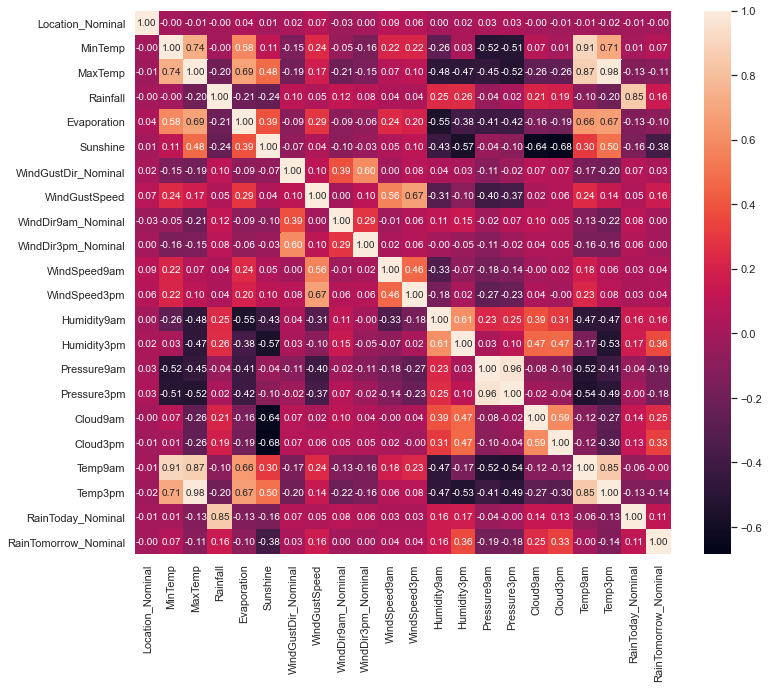

In [71]:
#dropping redundant columns
weatherAUSData_nb = weatherAUSData_nb.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm',
                                            'RainToday','RainTomorrow'], axis = 1)

plt.figure(figsize=(12,10))
sns.heatmap(weatherAUSData_nb.corr(),annot=True,fmt='.2f')

Based on the heatmap above, there are many correlated variables. 

1. MaxTemp and Temp3pm (0.98)
2. Pressure9am and Pressure3pm (0.96)
3. MinTemp and Temp9am (0.91)
4. MaxTemp and Temp9am (0.87)
5. RainToday and Rainfall (0.85)
6. Temp9am and Temp3pm (0.85)
7. MinTemp and MaxTemp (0.74)
8. MinTemp and Temp3pm (0.71)
9. MaxTemp and Evaporation (0.69)
10. Sunshine and Cloud3pm (-0.68)
11. Evaporation and Temp3pm (0.67)
12. WindGustSpeed and WindSpeed3pm (0.67)
13. Evaporation and Temp9am (0.66)
14. Sunshine and Cloud9am (-0.64)
15. Humidity9am and Humidity3pm (0.61)
16. WindGustDir_Nominal and WindDir3pm_Nominal (0.60)
17. Cloud9am and Cloud3pm (0.59)
18. MinTemp and Evaporation (0.58)
19. Sunshine and Humidity3pm (-0.57)
20. WindGustSpeed and WindSpeed9am (0.56)
21. Evaporation and Humidity9am (-0.55)
22. Pressure3pm and Temp9am (-0.54)
23. Humidity3pm and Temp3pm (-0.53)
24. Pressure9am and Temp9am (-0.52)
25. MinTemp and Pressure9am (-0.52)
26. MaxTemp and Pressure3pm (-0.52)
27. MinTemp and Pressure3pm (-0.51)
28. Sunshine and Temp3pm (0.50)
29. Pressure3pm and Temp3pm (-0.49)
30. MaxTemp and Humidity9am (-0.48)
31. MaxTemp and Sunshine (0.48)
32. Humidity9am and Temp3pm (-0.47)
33. Humidity9am and Temp9am (-0.47)
34. Humidity3pm and Cloud3pm (0.47)
35. Humidity3pm and Cloud9am (0.47)
36. MaxTemp and Humidity3pm (-0.47)
37. WindSpeed9am and WindSpeed3pm (0.46)
38. MaxTemp and Pressure9am (-0.45)
29. Sunshine and Humidity9am (-0.43)
30. Evaporation and Pressure3pm (-0.42)
31. Evaporation and Pressure9am (-0.41)
32. Pressure9am and Temp3pm (-0.41)
33. WindGustSpeed and Pressure9am (-0.40)

In [72]:
#univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


weatherAUSData_nb_noNA = weatherAUSData_nb.dropna()

X_nb = weatherAUSData_nb_noNA.iloc[:,0:21]  #predictor columns
y_nb = weatherAUSData_nb_noNA.iloc[:,-1]    #target column 

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X_nb,np.ravel(y_nb,order='C'))
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_nb.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

                Specs        Score
5            Sunshine  7601.063185
13        Humidity3pm  7170.685248
17           Cloud3pm  5540.753769
16           Cloud9am  3009.305604
14        Pressure9am  1666.810039
15        Pressure3pm  1455.953212
12        Humidity9am  1301.898588
7       WindGustSpeed  1280.045967
3            Rainfall  1240.911082
19            Temp3pm   864.753546
20  RainToday_Nominal   612.102669
2             MaxTemp   475.279202


Based on feature selection, the best combination of variables to predict if it will rain the next day would be:

1. Humidity3pm and Cloud3pm
2. Pressure3pm and Sunshine
3. Pressure3pm and Humidity3pm
4. Pressure3pm and Cloud3pm

#### Split data into test and training, standardize and balance data
I will split the data into test (25%) and training (75%). I will use the stratify parameter on y to ensure that I have both target classes in the training set and test set. Next, I will standardize the dataset using StandardScalar and transform the data. I will be skipping the balancing the dataset for now.

In [73]:
X_nb = weatherAUSData_nb_noNA.drop(['RainTomorrow_Nominal'], axis = 1)
y_nb = weatherAUSData_nb_noNA[['RainTomorrow_Nominal']]


#splitting data into test and training data. Training set trains the model
#stratifying y to preserve the same proportions of each class as observed in the original dataset
#adding random state to re-produce the same results if needed
nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(X_nb, y_nb, test_size = 0.25, stratify = y_nb,random_state = 42)

#standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(nb_X_train)

nb_X_train = scaler.transform(nb_X_train)
nb_X_test = scaler.transform(nb_X_test)

While I had initially said I wasn't going to drop NAs, these values were causing issues when I needed to standardize the data. Therefore, I dropped records with NAs. This dataset is very large so I should have enough records to predict the target variable.

#### Implement algorithm
First, I will implement Gaussian Naïve Bayes’ with all the varibles. My primary objective for doing this is to see how well the model can do with all the variables. My assumption is , the model won't do well as there are many correlated variables. Next, I will implement the algorithm with the 4 combinations of variables I mentioned in the Feature Selection section. 

[0. 0. 0. ... 0. 0. 1.]
[[7762 1303]
 [ 678 1008]]
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89      9065
         1.0       0.44      0.60      0.50      1686

    accuracy                           0.82     10751
   macro avg       0.68      0.73      0.70     10751
weighted avg       0.84      0.82      0.83     10751



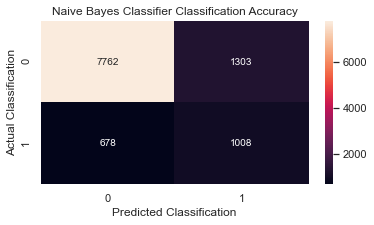

Accuracy on test set: 81.57380708771277
CV accuracy on test set: 81.06228062591858


In [75]:
#importing GaussianNB
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# fit model
classifier.fit(nb_X_train, np.ravel(nb_y_train))
nb_y_pred = classifier.predict(nb_X_test)
print(nb_y_pred)

#printing accuracy score and prediction matrix
print(confusion_matrix(nb_y_test, nb_y_pred))
print(classification_report(nb_y_test, nb_y_pred))

#plotting a more visually appealing confusion Matrix 
cm = confusion_matrix(nb_y_test, nb_y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True,fmt="d")
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('Naive Bayes Classifier Classification Accuracy')
plt.show()

accuracy =  accuracy_score(nb_y_test,nb_y_pred)*100

print("Accuracy on test set:", accuracy)

#k fold cross validation
from sklearn.model_selection import KFold
fold = KFold(n_splits=10,random_state=1, shuffle=True)

#test CV
test_results = cross_val_score(classifier, nb_X_test, np.ravel(nb_y_test), cv=fold)
print("CV accuracy on test set:", test_results.mean()*100)


For the first attempt, the cross validation score for the test set is 81.06%. I will now implement the algorithm using
Humidity3pm and Cloud3pm as predictor variables.

[0. 0. 1. ... 0. 0. 1.]
[[8459  606]
 [ 983  703]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      9065
         1.0       0.54      0.42      0.47      1686

    accuracy                           0.85     10751
   macro avg       0.72      0.68      0.69     10751
weighted avg       0.84      0.85      0.84     10751



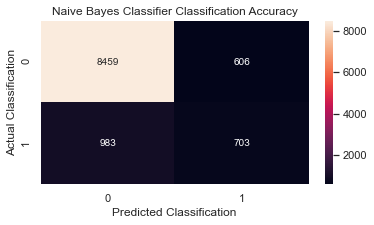

Accuracy on test set: 85.21997953678728
CV accuracy on test set: 85.13618915881388


In [76]:
X_nb = weatherAUSData_nb_noNA[['Humidity3pm','Cloud3pm']]
y_nb = weatherAUSData_nb_noNA[['RainTomorrow_Nominal']]


#splitting data into test and training data. Training set trains the model
#stratifying y to preserve the same proportions of each class as observed in the original dataset
#adding random state to re-produce the same results if needed
nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(X_nb, y_nb, test_size = 0.25, stratify = y_nb,random_state = 42)

#standardizing data
scaler = StandardScaler()
scaler.fit(nb_X_train)

nb_X_train = scaler.transform(nb_X_train)
nb_X_test = scaler.transform(nb_X_test)

classifier = GaussianNB()

# fit model
classifier.fit(nb_X_train, np.ravel(nb_y_train))
nb_y_pred = classifier.predict(nb_X_test)
print(nb_y_pred)

#printing accuracy score and prediction matrix
print(confusion_matrix(nb_y_test, nb_y_pred))
print(classification_report(nb_y_test, nb_y_pred))

#plotting a more visually appealing confusion Matrix 
cm = confusion_matrix(nb_y_test, nb_y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True,fmt="d")
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('Naive Bayes Classifier Classification Accuracy')
plt.show()


accuracy =  accuracy_score(nb_y_test,nb_y_pred)*100

print("Accuracy on test set:", accuracy)

#k fold cross validation
fold = KFold(n_splits=10,random_state=1, shuffle=True)

#test CV
test_results = cross_val_score(classifier, nb_X_test, np.ravel(nb_y_test), cv=fold)
print("CV accuracy on test set:", test_results.mean()*100)


When I used Humidity3pm and Cloud3pm as predictor variables, the cross validation accuracy score for the test set improved to 85.14%

[0. 0. 0. ... 0. 0. 1.]
[[8686  379]
 [1172  514]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      9065
         1.0       0.58      0.30      0.40      1686

    accuracy                           0.86     10751
   macro avg       0.73      0.63      0.66     10751
weighted avg       0.83      0.86      0.84     10751



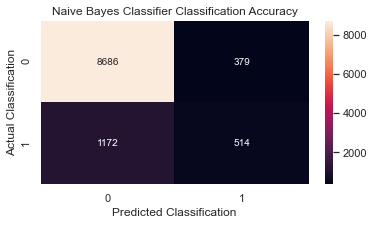

Accuracy on test set: 85.5734350292996
CV accuracy on test set: 85.257153972508


In [77]:
X_nb = weatherAUSData_nb_noNA[['Pressure3pm','Sunshine']]
y_nb = weatherAUSData_nb_noNA[['RainTomorrow_Nominal']]


#splitting data into test and training data. Training set trains the model
#stratifying y to preserve the same proportions of each class as observed in the original dataset
#adding random state to re-produce the same results if needed
nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(X_nb, y_nb, test_size = 0.25, stratify = y_nb,random_state = 42)

#standardizing data
scaler = StandardScaler()
scaler.fit(nb_X_train)

nb_X_train = scaler.transform(nb_X_train)
nb_X_test = scaler.transform(nb_X_test)

classifier = GaussianNB()

# fit model
classifier.fit(nb_X_train, np.ravel(nb_y_train))
nb_y_pred = classifier.predict(nb_X_test)
print(nb_y_pred)

#printing accuracy score and prediction matrix
print(confusion_matrix(nb_y_test, nb_y_pred))
print(classification_report(nb_y_test, nb_y_pred))

#plotting a more visually appealing confusion Matrix 
cm = confusion_matrix(nb_y_test, nb_y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True,fmt="d")
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('Naive Bayes Classifier Classification Accuracy')
plt.show()


accuracy =  accuracy_score(nb_y_test,nb_y_pred)*100

print("Accuracy on test set:", accuracy)

#k fold cross validation
fold = KFold(n_splits=10,random_state=1, shuffle=True)

#test CV
test_results = cross_val_score(classifier, nb_X_test, np.ravel(nb_y_test), cv=fold)
print("CV accuracy on test set:", test_results.mean()*100)


When I used Pressure3pm and Sunshine as predictor variables, the cross validation accuracy score for the test set improved to 85.26%.

[0. 0. 0. ... 0. 0. 1.]
[[8910  155]
 [1259  427]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      9065
         1.0       0.73      0.25      0.38      1686

    accuracy                           0.87     10751
   macro avg       0.80      0.62      0.65     10751
weighted avg       0.85      0.87      0.84     10751



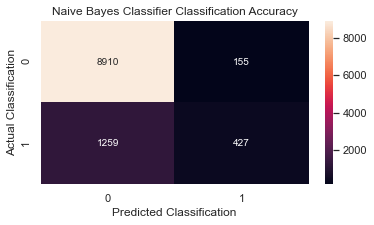

Accuracy on test set: 86.84773509440981
CV accuracy on test set: 86.86616235843347


In [78]:
X_nb = weatherAUSData_nb_noNA[['Pressure3pm','Humidity3pm']]
y_nb = weatherAUSData_nb_noNA[['RainTomorrow_Nominal']]


#splitting data into test and training data. Training set trains the model
#stratifying y to preserve the same proportions of each class as observed in the original dataset
#adding random state to re-produce the same results if needed
nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(X_nb, y_nb, test_size = 0.25, stratify = y_nb,random_state = 42)

#standardizing data
scaler = StandardScaler()
scaler.fit(nb_X_train)

nb_X_train = scaler.transform(nb_X_train)
nb_X_test = scaler.transform(nb_X_test)

classifier = GaussianNB()

# fit model
classifier.fit(nb_X_train, np.ravel(nb_y_train))
nb_y_pred = classifier.predict(nb_X_test)
print(nb_y_pred)

#printing accuracy score and prediction matrix
print(confusion_matrix(nb_y_test, nb_y_pred))
print(classification_report(nb_y_test, nb_y_pred))

#plotting a more visually appealing confusion Matrix 
cm = confusion_matrix(nb_y_test, nb_y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True,fmt="d")
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('Naive Bayes Classifier Classification Accuracy')
plt.show()

accuracy =  accuracy_score(nb_y_test,nb_y_pred)*100

print("Accuracy on test set:", accuracy)

#k fold cross validation
fold = KFold(n_splits=10,random_state=1, shuffle=True)

#test CV
test_results = cross_val_score(classifier, nb_X_test, np.ravel(nb_y_test), cv=fold)
print("CV accuracy on test set:", test_results.mean()*100)


When I used Pressure3pm and Humidity3pm as predictor variables, the cross validation accuracy score for the test set improved to 86.87%.

[0. 0. 0. ... 0. 0. 1.]
[[8914  151]
 [1470  216]]
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      9065
         1.0       0.59      0.13      0.21      1686

    accuracy                           0.85     10751
   macro avg       0.72      0.56      0.56     10751
weighted avg       0.82      0.85      0.81     10751



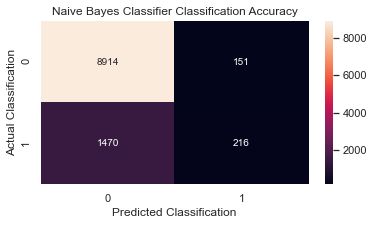

Accuracy on test set: 84.92233280625058
CV accuracy on test set: 84.91292469957637


In [79]:
X_nb = weatherAUSData_nb_noNA[['Pressure3pm','Cloud3pm']]
y_nb = weatherAUSData_nb_noNA[['RainTomorrow_Nominal']]


#splitting data into test and training data. Training set trains the model
#stratifying y to preserve the same proportions of each class as observed in the original dataset
#adding random state to re-produce the same results if needed
nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(X_nb, y_nb, test_size = 0.25, stratify = y_nb,random_state = 42)

#standardizing data
scaler = StandardScaler()
scaler.fit(nb_X_train)

nb_X_train = scaler.transform(nb_X_train)
nb_X_test = scaler.transform(nb_X_test)

classifier = GaussianNB()

# fit model
classifier.fit(nb_X_train, np.ravel(nb_y_train))
nb_y_pred = classifier.predict(nb_X_test)
print(nb_y_pred)

#printing accuracy score and prediction matrix
print(confusion_matrix(nb_y_test, nb_y_pred))
print(classification_report(nb_y_test, nb_y_pred))

#plotting a more visually appealing confusion Matrix 
cm = confusion_matrix(nb_y_test, nb_y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True,fmt="d")
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('Naive Bayes Classifier Classification Accuracy')
plt.show()

accuracy =  accuracy_score(nb_y_test,nb_y_pred)*100

print("Accuracy on test set:", accuracy)

#k fold cross validation
fold = KFold(n_splits=10,random_state=1, shuffle=True)

#test CV
test_results = cross_val_score(classifier, nb_X_test, np.ravel(nb_y_test), cv=fold)
print("CV accuracy on test set:", test_results.mean()*100)


When I used Pressure3pm and Cloud3pm as predictor variables, the cross validation accuracy score for the test set declined to 84.91%.

#### Short summary for Naïve Bayes’
Gaussian Naïve Bayes’ performed better than Decision Tree but not better than other classifiers. For my first attempt of this implementation, I decided to use all variables as predictor features as I wanted to see how the model with do. This attempt had a cross validation accuracy score of 81.06%. For my second attempt, I used Humidity3pm and Cloud3pm as predictor features and this time the accuracy score was 85.14%. For my third attempt, I used Pressure3pm and Sunshine as predictor features and this time the accuracy score was 85.26%. For the fourth attempt, I used Pressure3pm and Humidity3pm predictor features and this time the accuracy score was 86.87%. On my final attempt, I used Pressure3pm and Cloud3pm as predictor features and this time the accuracy score declined to 84.91%. For Gaussian Naïve Bayes’, I conclude that my fourth attempt is the best model.

### Comparing algorithms
I would like to compare the 5 classifiers above against the Neural Network classifier. I will be running the for loop 3 separate times, once with all variables, once with predictors from the best performing Naïve Bayes’ model and once with quantitative variables per the k-NN implementation.

In [80]:
# Comparing Algorithms 
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Algorithms
models = []
models.append(( 'Naive Bayes' , GaussianNB()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'Decision Tree' , DecisionTreeClassifier()))
models.append(( 'RandomForestClassifier' , RandomForestClassifier()))
models.append(( 'GradientBoostingClassifier' , GradientBoostingClassifier()))
models.append(( 'MLPClassifier' , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=347288723)))

# Test options and evaluation metric
seed = 347288723 
print('AUS weather dataset with all variables:\n')
results = []
names = []
for name, model in models:
    models_kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_oversample, np.ravel(y_oversample, order = 'C'), cv=models_kfold) 
    cv_results_testing = cross_val_score(model, X_test, np.ravel(y_test, order = 'C'), cv=models_kfold)
    results.append(cv_results)
    names.append(name)
    msg = "Training accuracy %s: %f %%" % (name, cv_results.mean()*100)
    print(msg)
    msg_testing = "Testing accuracy %s: %f %%" % (name, cv_results_testing.mean()*100)
    print(msg_testing)
    print('10-Fold cross-validation accuracy score applied for the training data for 6 classifiers')
    
#re-running loop for naive bayes predictor variables with the best accuracy scores
X_nb = weatherAUSData_nb_noNA[['Pressure3pm','Humidity3pm']]
y_nb = weatherAUSData_nb_noNA[['RainTomorrow_Nominal']]

nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(X_nb, y_nb, test_size = 0.25, stratify = y_nb,random_state = 42)
scaler = StandardScaler()
scaler.fit(nb_X_train)
nb_X_train = scaler.transform(nb_X_train)
nb_X_test = scaler.transform(nb_X_test)

# Test options and evaluation metric
seed = 347288723 
print('\nAUS weather dataset with Naive Bayes predictor variables:\n')
results = []
names = []
for name, model in models:
    models_kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, nb_X_train, np.ravel(nb_y_train, order = 'C'), cv=models_kfold) 
    cv_results_testing = cross_val_score(model, nb_X_test, np.ravel(nb_y_test, order = 'C'), cv=models_kfold)
    results.append(cv_results)
    names.append(name)
    msg = "Training accuracy %s: %f %%" % (name, cv_results.mean()*100)
    print(msg)
    msg_testing = "Testing accuracy %s: %f %%" % (name, cv_results_testing.mean()*100)
    print(msg_testing)
    print('10-Fold cross-validation accuracy score applied for the training data for 6 classifiers')  
    
    
#re-running loop for knn predictor variables    
seed = 347288723 
print('\nAUS weather dataset with k-NN predictor variables:\n')
results = []
names = []
for name, model in models:
    models_kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, knn_X_train, np.ravel(knn_y_train, order = 'C'), cv=models_kfold) 
    cv_results_testing = cross_val_score(model, knn_X_test, np.ravel(knn_y_test, order = 'C'), cv=models_kfold)
    results.append(cv_results)
    names.append(name)
    msg = "Training accuracy %s: %f %%" % (name, cv_results.mean()*100)
    print(msg)
    msg_testing = "Testing accuracy %s: %f %%" % (name, cv_results_testing.mean()*100)
    print(msg_testing)
    print('10-Fold cross-validation accuracy score applied for the training data for 6 classifiers')   
    

AUS weather dataset with all variables:

Training accuracy Naive Bayes: 75.002882 %
Testing accuracy Naive Bayes: 81.612613 %
10-Fold cross-validation accuracy score applied for the training data for 6 classifiers
Training accuracy KNN: 87.196687 %
Testing accuracy KNN: 86.446713 %
10-Fold cross-validation accuracy score applied for the training data for 6 classifiers
Training accuracy Decision Tree: 85.415958 %
Testing accuracy Decision Tree: 81.759384 %
10-Fold cross-validation accuracy score applied for the training data for 6 classifiers
Training accuracy RandomForestClassifier: 93.087232 %
Testing accuracy RandomForestClassifier: 88.129831 %
10-Fold cross-validation accuracy score applied for the training data for 6 classifiers
Training accuracy GradientBoostingClassifier: 88.692715 %
Testing accuracy GradientBoostingClassifier: 88.188540 %
10-Fold cross-validation accuracy score applied for the training data for 6 classifiers
Training accuracy MLPClassifier: 80.801726 %
Testing a

Based on the 3 for loops above, looks like the best performing model is:

1. Gradient Boosting for all variables.
2. Gaussian Naïve Bayes’ for Pressure3pm and Humidity3pm as predictor variables. Gradient Boosting had the 3rd best accuracy score here.
3. Random Forest for quantitative variables. Gradient Boosting had the 3rd best accuracy score here.

Therefore, I will conclude that Gradient Boosting is the best classifier algorithm for this dataset. I will re-paste results from the best performing Gradient Boosting model below.

In [81]:
#best performing Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators = 100, max_depth = 15, learning_rate = 0.075, max_features = 8, random_state = 1)
gb.fit(X_oversample, np.ravel(y_oversample, order = 'C'))
print("Accuracy on training set: {:.3f}".format(gb.score(X_oversample, np.ravel(y_oversample, order = 'C'))))
print("\nAccuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

#cross validation on training set
cv_scores_training = cross_val_score(gb, X_oversample, np.ravel(y_oversample,order='C'), cv=10, n_jobs = -1)

#print each cv score (accuracy) and average them
print("\n", cv_scores_training)
print("CV accuracy on training set:", np.mean(cv_scores_training))

#cross validation on test set
cv_scores_test = cross_val_score(gb, X_test, np.ravel(y_test,order='C'), cv=10)

#print each cv score (accuracy) and average them
print("\n", cv_scores_test)
print("CV accuracy on test set:", np.mean(cv_scores_test))

Accuracy on training set: 1.000

Accuracy on test set: 0.883

 [0.79537639 0.86033626 0.9650363  0.96560948 0.96484524 0.96427207
 0.96197937 0.96847535 0.96694057 0.96158991]
CV accuracy on training set: 0.937446093436753

 [0.88454012 0.88747554 0.8816047  0.88356164 0.89334638 0.87279843
 0.88356164 0.87964775 0.88356164 0.88148874]
CV accuracy on test set: 0.8831586583890931


Confusion Matrix 
 [[8290  433]
 [ 762  734]]


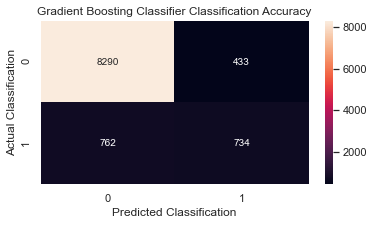

In [82]:
y_predict = gb.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix \n",cm)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True,fmt="d")
plt.xlabel('Predicted Classification')
plt.ylabel('Actual Classification')
plt.title('Gradient Boosting Classifier Classification Accuracy')
plt.show()

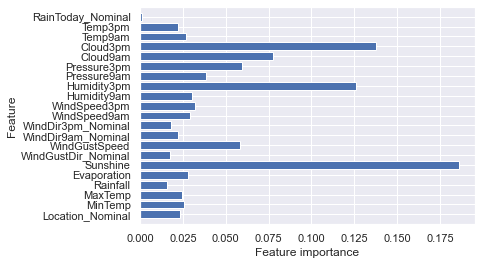

In [83]:
plot_feature_importances_weatherAUS(gb)

The best performing Gradient Boosting model uses 100 trees, with maximum depth 15, learning rate 0.075 and maximum features 8. The most important variables in predicting if it will rain the next day are Sunshine, Cloud3pm and Humidity3pm.